# Conduit Experiment Analysis

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.io as sp

### Plot of theoretical speed-amplitude relation

In [2]:
avals = np.linspace(1.1, 30, 100)
cvals = (avals**2 * np.log(avals**2) - avals**2 + 1) / ((avals-1)**2)

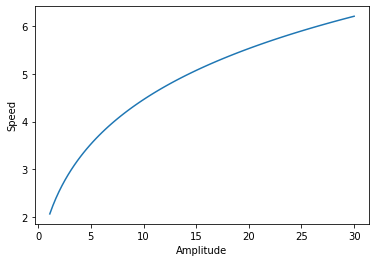

In [3]:
plt.plot(avals,cvals)
plt.ylabel('Speed')
plt.xlabel('Amplitude')
plt.show()

### Conduit

In [4]:
# Data dictionary
dict07 = sp.loadmat('expData07.mat')
dict07

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Mon Nov 13 15:02:40 2017',
 '__version__': '1.0',
 '__globals__': [],
 'A0': array([[8.46]]),
 'A0_error': array([[0.2]]),
 'Amat': array([[1.29883487, 1.28420023, 1.07997691, ..., 1.22934478, 1.2407938 ,
         1.2551797 ],
        [1.21227076, 1.04809743, 1.02450125, ..., 1.22079285, 1.2407938 ,
         1.2551797 ],
        [1.29883487, 1.29883487, 1.30765546, ..., 1.22079285, 1.22649082,
         1.2551797 ],
        ...,
        [5.1953395 , 4.9631752 , 4.76438452, ..., 1.23792657, 1.2551797 ,
         1.21227076],
        [5.1953395 , 4.9631752 , 4.64706029, ..., 1.30324144, 1.29883487,
         1.29883487],
        [3.8819529 , 4.08758413, 4.22409011, ..., 2.04321166, 1.84574763,
         1.82829385]]),
 'U0': array([[0.12938929]]),
 't_vec': array([[ 0.00000e+00,  6.80000e-01,  1.68000e+00,  2.68000e+00,
          3.68000e+00,  4.68000e+00,  5.68000e+00,  6.68000e+00,
          7.68000e+00,  8.68000e+00,  9.6

In [5]:
A0 = 8.46

In [6]:
A0_error = .2

In [7]:
# Amplitude Matrix
mat07 = dict07['Amat']
mat07.shape

(227, 4418)

In [8]:
dict07['t_vec'].size

227

In [9]:
dict07['z_vec'].size

4418

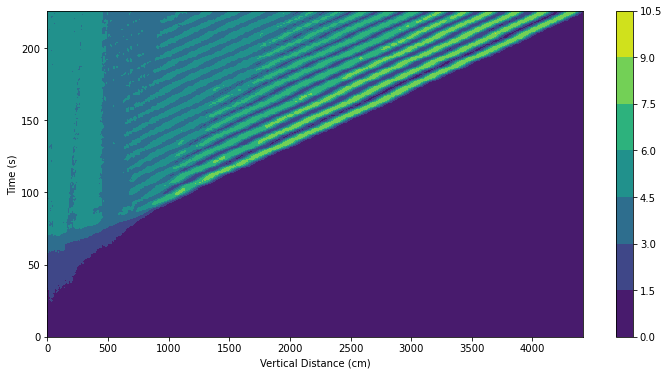

In [232]:
plt.figure(figsize = (12,6))
plt.contourf(mat07)
plt.colorbar()
plt.xlabel('Vertical Distance (cm)')
plt.ylabel('Time (s)')
# plt.plot([1000,4000],[110, 220])
plt.show()

In [11]:
# or for each vertical distance coordinate where there is a possible soliton index, take the smallest index from that
## list, generate a list of all the points of the soliton to find a more accurate slope

**Full Wave**

In [28]:
fullWaveIdxs = []                  # first get possible soliton indexes
for i in range(227):
    for j in range(4418):
        if (mat07[i,j]>8.26) & (mat07[i,j]<8.66):
            fullWaveIdxs.append((i,j))

In [29]:
solitonIdxs = []
dists = [idx[1] for idx in fullWaveIdxs]
for d in set(dists):
    column_idxs = [idx for idx in fullWaveIdxs if idx[1] == d]
    solitonIdxs.append(min(column_idxs))

In [30]:
dists = [idx[1] for idx in fullWaveIdxs]
# set(dists)

In [31]:
# solitonIdxs[40:50]

In [32]:
solitonIdxs = [(idx[1],idx[0]) for idx in solitonIdxs]
# solitonIdxs[40:50]

In [33]:
xvals = [idx[0] for idx in solitonIdxs]
yvals = [idx[1] for idx in solitonIdxs]

In [39]:
# solitonIdxs[40:50]

In [38]:
# list(zip(*solitonIdxs[40:50]))

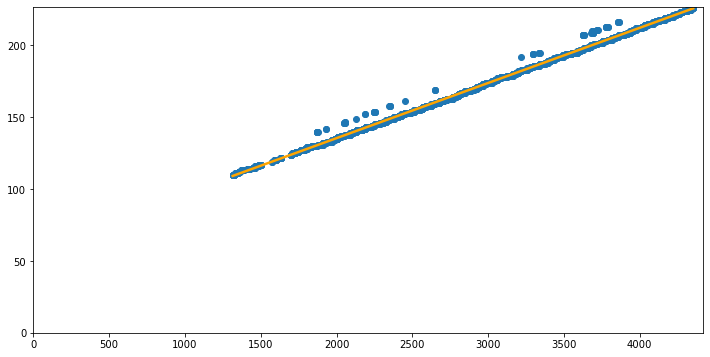

In [36]:
m, b = np.polyfit(xvals, yvals, deg = 1)
y_hat_vals = [m*x + b for x in xvals]

plt.figure(figsize = (12,6))
plt.scatter(*zip(*solitonIdxs))
plt.plot(xvals, y_hat_vals, c = 'orange', linewidth = 2.5)
plt.xlim(0,4417)
plt.ylim(0,227)
plt.show()

In [37]:
1/m

26.04626658704094

In [99]:
def compute_soliton_speed(dictionary):
    mat = dictionary['Amat']
    times = mat.shape[0]
    distances = mat.shape[1]
    a0 = dictionary['A0'][0,0]
    a0_error = dictionary['A0_error'][0,0]
    solitonAmpRange = ((a0 - a0_error), (a0 + a0_error))
    
    ## FULL WAVE
    fullWaveIdxs = []                    # first get possible soliton indexes
    for i in range(times):
        for j in range(distances):
            if (mat[i,j]>solitonAmpRange[0]) & (mat[i,j]<solitonAmpRange[1]):
                fullWaveIdxs.append((i,j))
                
                
    # get the index with the smallest time coordinate from every column where there is a soliton
    solitonIdxs = []           
    columns = [idx[1] for idx in fullWaveIdxs]                  
    for d in set(columns):
        column_idxs = [idx for idx in fullWaveIdxs if idx[1] == d]
        if len(column_idxs) != 1:
            solitonIdxs.append(min(column_idxs))
        
    # change order of the coordinates for each soliton index
    solitonIdxs = [(idx[1],idx[0]) for idx in solitonIdxs]

    # separate the time values and the distance values for use of polyfit() function
    xvals = [idx[0] for idx in solitonIdxs]
    yvals = [idx[1] for idx in solitonIdxs]
    m, b = np.polyfit(xvals, yvals, deg = 1)
    
    # speed of the soliton is the inverse of the slope of this best-fit line
    return 1/m

In [22]:
compute_soliton_speed(sp.loadmat('expData07.mat'))

26.04626658704094

In [94]:
idxs = [idx for idx in fullWaveIdxs if idx[1] == 2217]
idxs

[(143, 2217), (144, 2217), (153, 2217)]

In [95]:
min(idxs)

(143, 2217)

### More Experiment Trials

In [225]:
dict34 = sp.loadmat('expData34.mat')
# dict34

In [1]:
# dict34['R0']

In [227]:
mat34 = dict34['Amat']

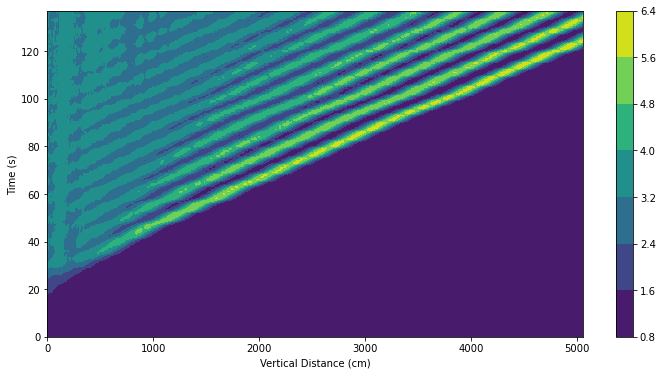

In [228]:
plt.figure(figsize = (12,6))
plt.contourf(mat34)
plt.set_cmap('viridis')
plt.colorbar()
plt.xlabel('Vertical Distance (cm)')
plt.ylabel('Time (s)')
plt.show()

In [118]:
dict17 = sp.loadmat('expData17.mat')
# dict17

In [119]:
mat17 = dict17['Amat']
dict17['A0']

array([[1.91]])

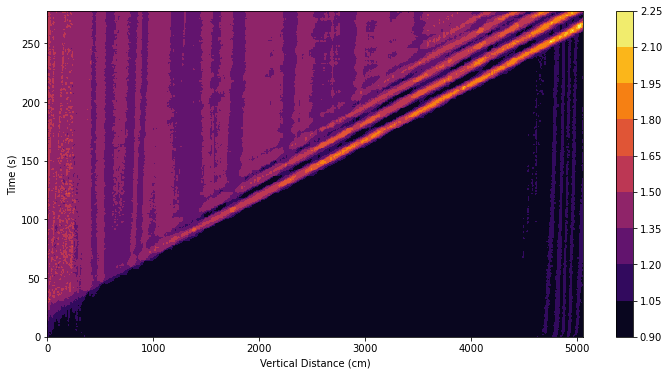

In [30]:
plt.figure(figsize = (12,6))
plt.contourf(mat17)
plt.set_cmap('inferno')
plt.colorbar()
plt.xlabel('Vertical Distance (cm)')
plt.ylabel('Time (s)')
plt.show()

In [62]:
dict19 = sp.loadmat('expData19.mat')
# dict19

In [63]:
mat19 = dict19['Amat']

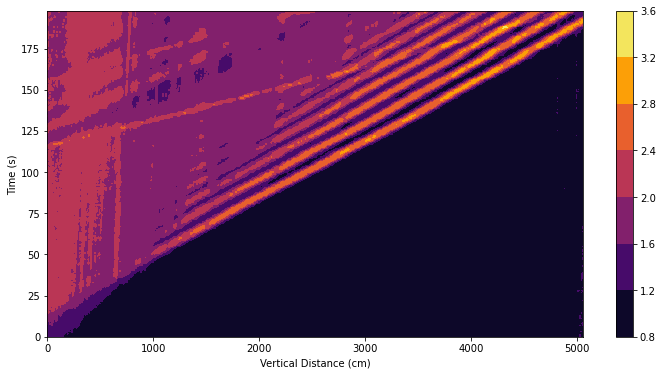

In [64]:
plt.figure(figsize = (12,6))
plt.contourf(mat19)
# plt.set_cmap('inferno')
plt.colorbar()
plt.xlabel('Vertical Distance (cm)')
plt.ylabel('Time (s)')
plt.show()

### Examining specific solitons

In [121]:
dict12 = sp.loadmat('expData12.mat')
dict12

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Mon Nov 13 15:02:42 2017',
 '__version__': '1.0',
 '__globals__': [],
 'A0': array([[11.3]]),
 'A0_error': array([[0.8]]),
 'Amat': array([[ 1.        ,  1.        ,  1.        , ...,  1.        ,
          1.        ,  1.        ],
        [ 1.        ,  1.0234096 ,  1.03665748, ...,  1.15833236,
          1.14432615,  1.01399899],
        [ 1.        ,  1.03286368,  1.00837348, ...,  1.08183022,
          1.12979517,  1.19004048],
        ...,
        [ 4.88299975,  4.61882885,  4.74796419, ...,  8.61371454,
          8.65343901,  8.62603305],
        [ 4.94500548,  4.92429343,  4.93257303, ...,  3.39858981,
          2.05262947,  1.        ],
        [ 4.45991337,  4.78052622,  4.76016191, ..., 10.7814265 ,
         10.95586611, 11.17296222]]),
 'U0': array([[0.12938929]]),
 't_vec': array([[  0.  ,   0.7 ,   1.7 ,   2.7 ,   3.7 ,   4.7 ,   5.7 ,   6.7 ,
           7.7 ,   8.7 ,   9.7 ,  10.7 ,  11.7 ,  12.7 ,  13.7

In [132]:
11.3-.8

10.5

In [133]:
11.3+.8

12.100000000000001

In [76]:
# dict12['A0_error'][0,0]

In [73]:
# solitonAmp = ((9 - .5), (9 + .5))
# solitonAmp

In [122]:
mat12 = dict12['Amat']
dict12['t_vec'].size

224

In [123]:
dict12['z_vec'].size

5374

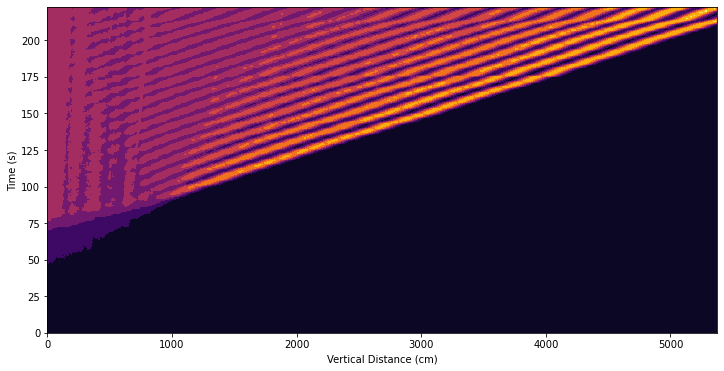

In [175]:
plt.figure(figsize = (12,6))
plt.contourf(mat12)
plt.set_cmap('inferno')
# plt.colorbar()
plt.xlabel('Vertical Distance (cm)')
plt.ylabel('Time (s)')
plt.show()

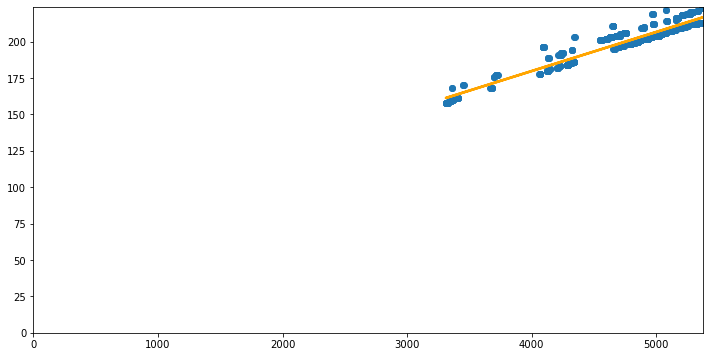

In [170]:
m, b = np.polyfit(xvals12, yvals12, deg = 1)
y_hat_vals = [m*x + b for x in xvals12]

plt.figure(figsize = (12,6))
plt.scatter(*zip(*solitonIdxs12))
plt.plot(xvals12, y_hat_vals, c = 'orange', linewidth = 2.5)
plt.xlim(0,dict12['z_vec'].size)
plt.ylim(0,dict12['t_vec'].size)
plt.show()

In [217]:
def compute_soliton_speed(dictionary):
    mat = dictionary['Amat']
    times = mat.shape[0]
    distances = mat.shape[1]
    a0 = dictionary['A0'][0,0]
    a0_error = dictionary['A0_error'][0,0]
    solitonAmpRange = ((a0 - a0_error), (a0 + a0_error))
    
    ## FULL WAVE
    fullWaveIdxs = []                    # first get possible soliton indexes
    for i in range(times):
        for j in range(distances):
            if (mat[i,j]>solitonAmpRange[0]) & (mat[i,j]<solitonAmpRange[1]):
                fullWaveIdxs.append((i,j))
                
                
    # get the index with the smallest time coordinate from every column where there is a soliton
    solitonIdxs = []           
    columns = [idx[1] for idx in fullWaveIdxs]                  
    for d in set(columns):
        column_idxs = [idx for idx in fullWaveIdxs if idx[1] == d]
        solitonIdxs.append(min(column_idxs))
        
    # change order of the coordinates for each soliton index
    solitonIdxs = [(idx[1],idx[0]) for idx in solitonIdxs]

    # separate the time values and the distance values for use of polyfit() function
    xvals = [idx[0] for idx in solitonIdxs]
    yvals = [idx[1] for idx in solitonIdxs]
    m, b = np.polyfit(xvals, yvals, deg = 1)
    
    # speed of the soliton is the inverse of the slope of this best-fit line
    return {'speed':1/m, 'solitonIdxs':solitonIdxs, 'xvals':xvals, 'yvals':yvals, 'b':b}

In [199]:
new_dict = compute_soliton_speed(sp.loadmat('expData12.mat'))
1/ new_dict['speed']

0.00930950906823468

In [162]:
fullWaveIdxs12 = []                  # first get possible soliton indexes
for i in range(dict12['t_vec'].size):
    for j in range(dict12['z_vec'].size):
        if (mat12[i,j]>10) & (mat12[i,j]<12.1):
            fullWaveIdxs12.append((i,j))

In [163]:
solitonIdxs12 = []
columns = [idx[1] for idx in fullWaveIdxs12]
for d in set(columns):
    column_idxs = [idx for idx in fullWaveIdxs12 if idx[1] == d]
    solitonIdxs12.append(min(column_idxs))

In [164]:
# columns = [idx[1] for idx in fullWaveIdxs47]
# set(columns)

In [165]:
# solitonIdxs47[40:50]

In [166]:
solitonIdxs12 = [(idx[1],idx[0]) for idx in solitonIdxs12]
# solitonIdxs47[40:50]

In [167]:
xvals12 = [idx[0] for idx in solitonIdxs12]
yvals12 = [idx[1] for idx in solitonIdxs12]

In [168]:
# solitonIdxs[40:50]

In [169]:
# list(zip(*solitonIdxs[40:50]))

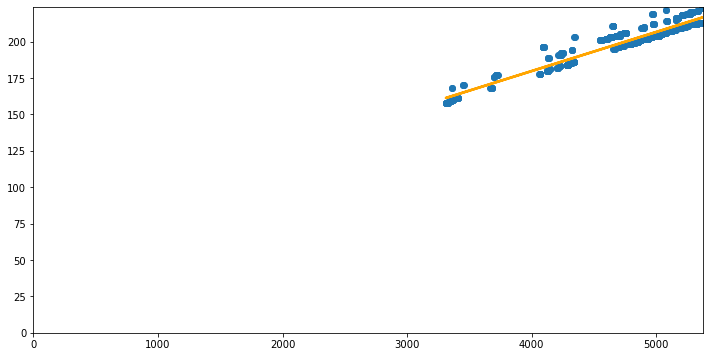

In [170]:
m, b = np.polyfit(xvals12, yvals12, deg = 1)
y_hat_vals = [m*x + b for x in xvals12]

plt.figure(figsize = (12,6))
plt.scatter(*zip(*solitonIdxs12))
plt.plot(xvals12, y_hat_vals, c = 'orange', linewidth = 2.5)
plt.xlim(0,dict12['z_vec'].size)
plt.ylim(0,dict12['t_vec'].size)
plt.show()

In [200]:
m

0.026851021184566073

# Finding speeds of all the solitons

In [218]:
speeds_list = []

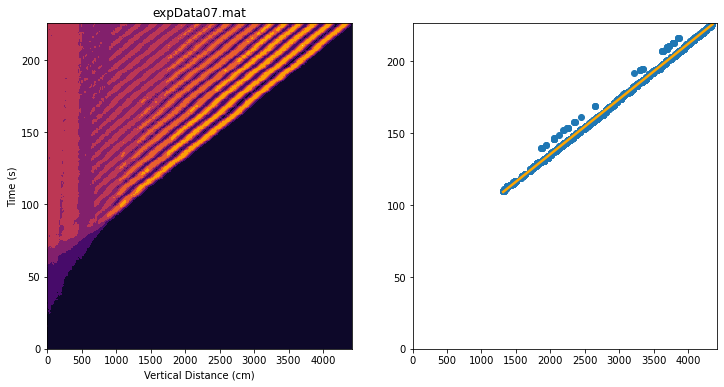

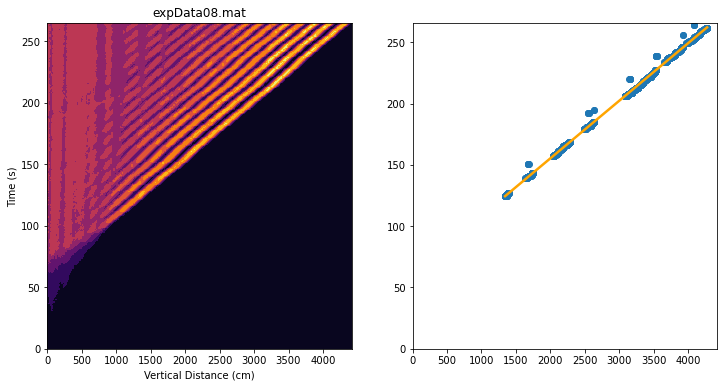

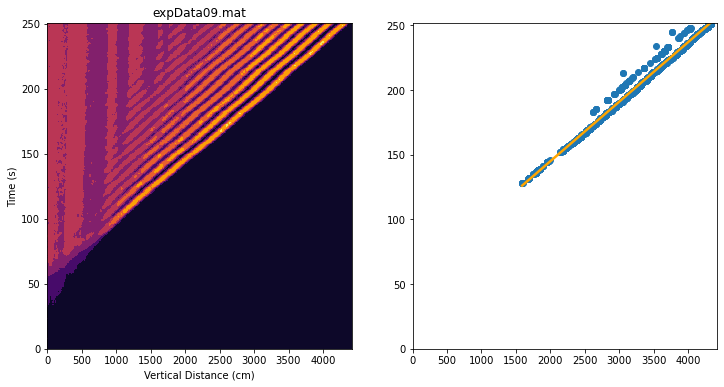

In [219]:
# data sets [7-9]
for num in range(7,10):
    data = 'expData0' + str(num) + '.mat'
    dictionary = sp.loadmat(data)
    a0 = dictionary['A0'][0,0]
    
    new_dict = compute_soliton_speed(dictionary)
    m = (1 / new_dict['speed'])
    
    # append speed to list
    speeds_list.append( (a0, new_dict['speed'], num) )
    
    #make two plots side by side
    y_hat_vals = [m*x + new_dict['b'] for x in new_dict['xvals']]
    
    plt.figure(figsize = (12, 6))
    
    plt.subplot(1, 2, 1)
    plt.contourf(dictionary['Amat'])
    plt.xlabel('Vertical Distance (cm)')
    plt.ylabel('Time (s)')
    plt.title(data)
    
    plt.subplot(1, 2, 2)
    plt.scatter(*zip(*new_dict['solitonIdxs']))
    plt.plot(new_dict['xvals'], y_hat_vals, c = 'orange', linewidth = 2.5)
    plt.xlim(0,dictionary['z_vec'].size)
    plt.ylim(0,dictionary['t_vec'].size)
    
    plt.show()    

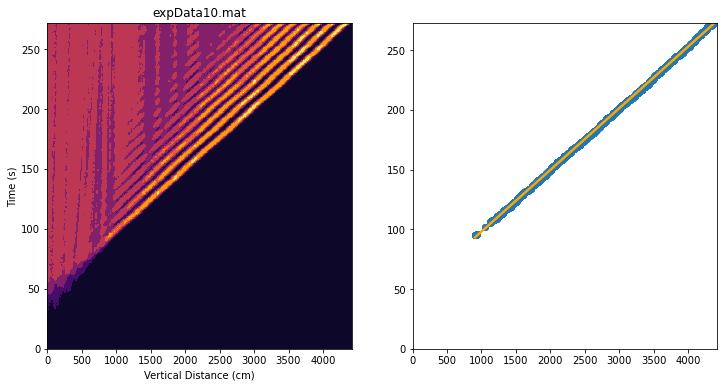

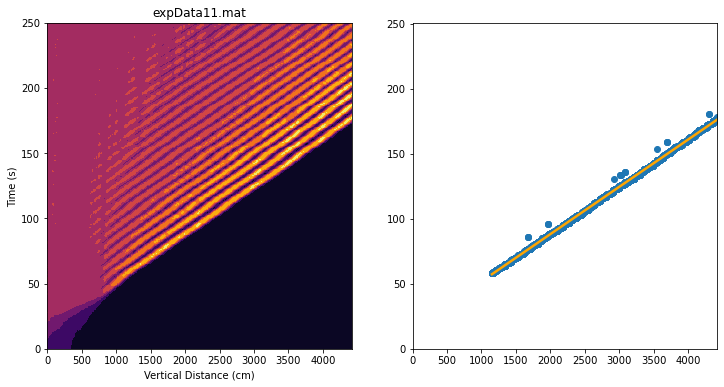

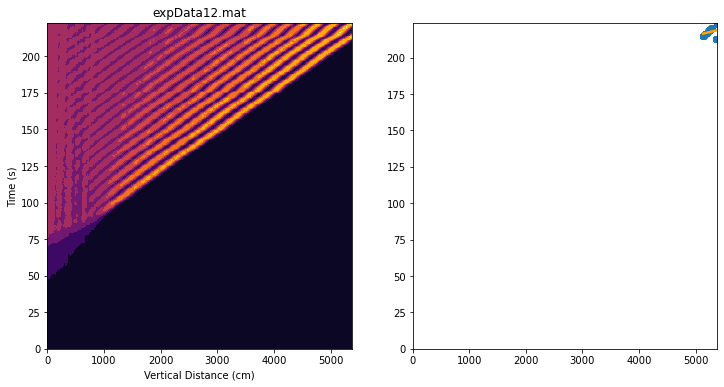

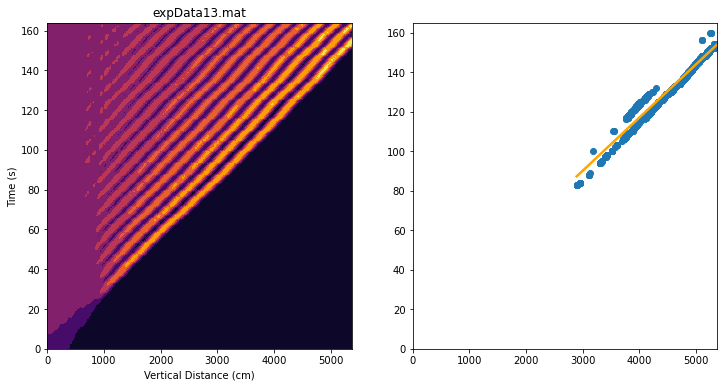

In [220]:
# data sets [10-13]
for num in range(10,14):
    data = 'expData' + str(num) + '.mat'
    dictionary = sp.loadmat(data)
    a0 = dictionary['A0'][0,0]
    
    new_dict = compute_soliton_speed(dictionary)
    m = (1 / new_dict['speed'])
    
    # append speed to list
    speeds_list.append( (a0, new_dict['speed'], num) )
    
    #make two plots side by side
    y_hat_vals = [m*x + new_dict['b'] for x in new_dict['xvals']]
    
    plt.figure(figsize = (12, 6))
    
    plt.subplot(1, 2, 1)
    plt.contourf(dictionary['Amat'])
    plt.xlabel('Vertical Distance (cm)')
    plt.ylabel('Time (s)')
    plt.title(data)
    
    plt.subplot(1, 2, 2)
    plt.scatter(*zip(*new_dict['solitonIdxs']))
    plt.plot(new_dict['xvals'], y_hat_vals, c = 'orange', linewidth = 2.5)
    plt.xlim(0,dictionary['z_vec'].size)
    plt.ylim(0,dictionary['t_vec'].size)
    
    plt.show()

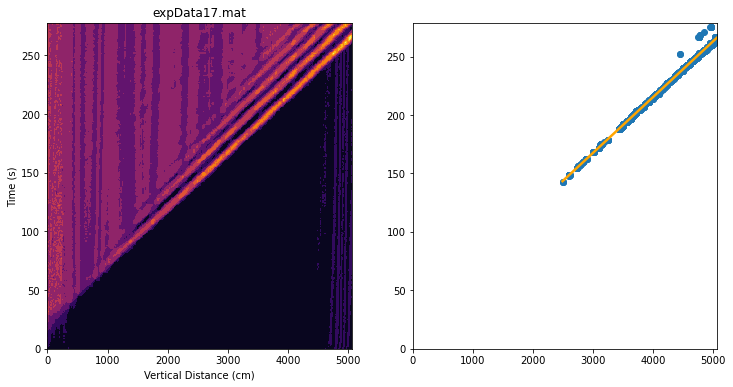

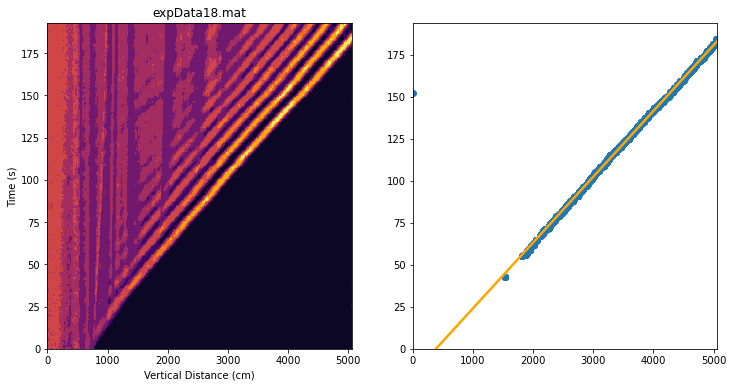

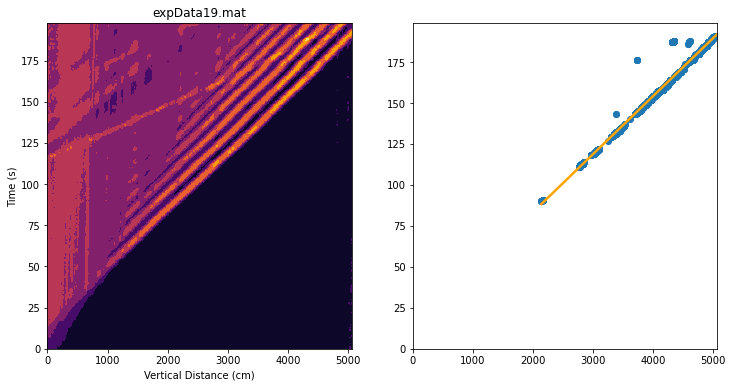

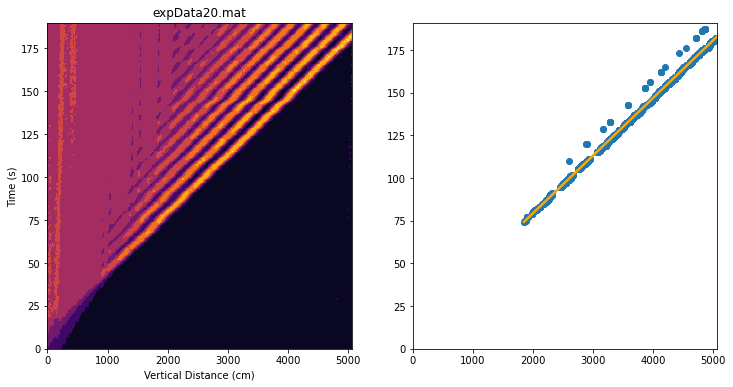

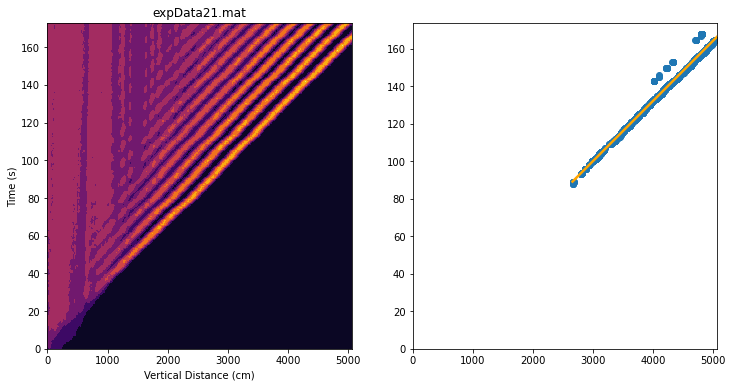

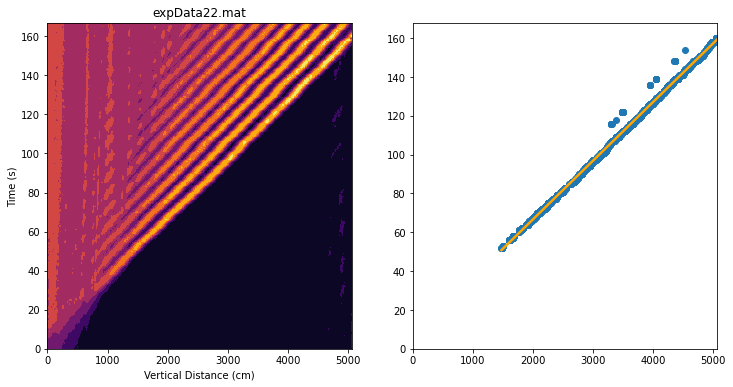

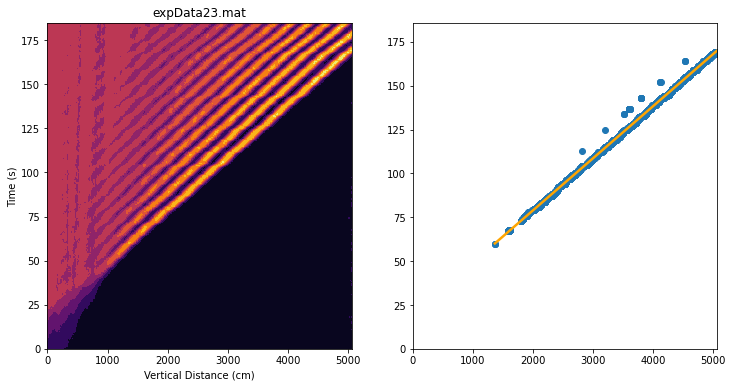

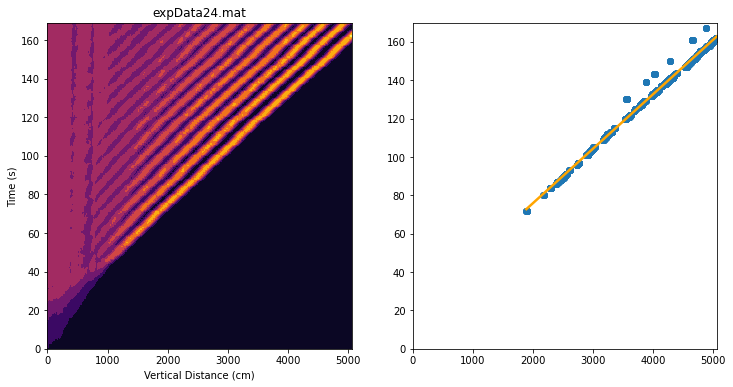

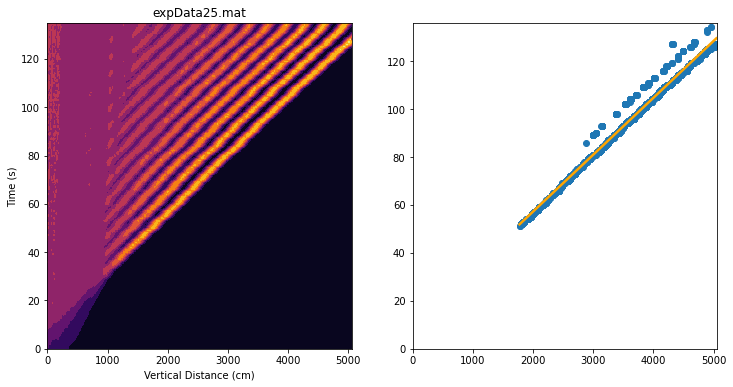

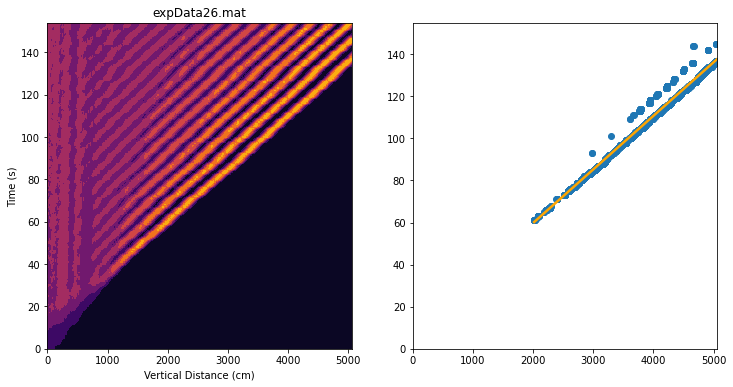

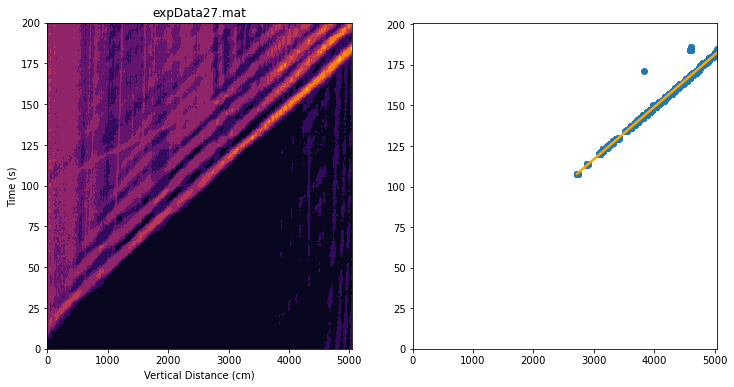

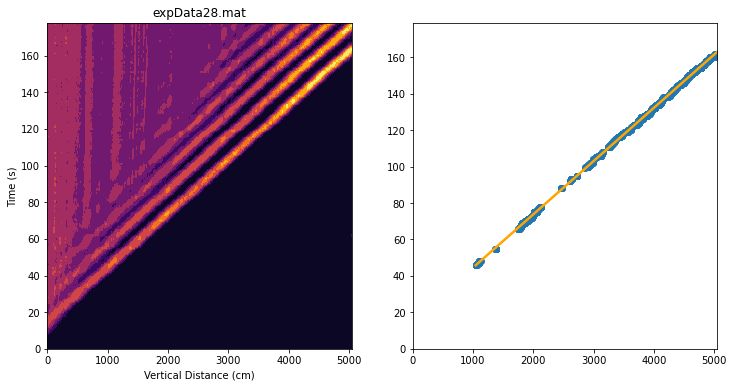

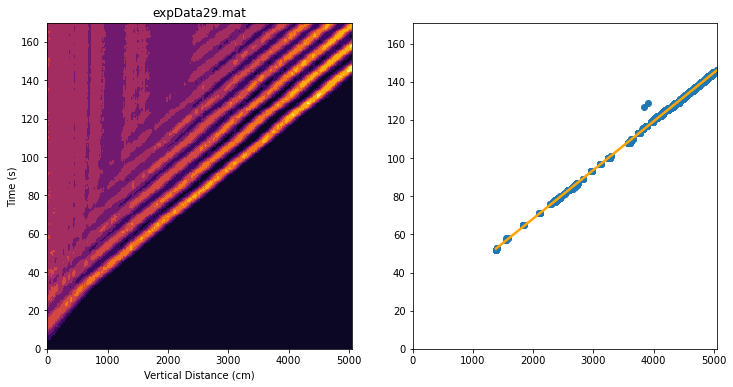

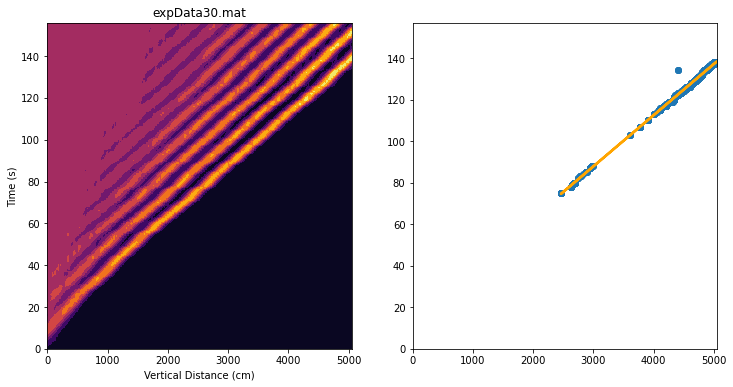

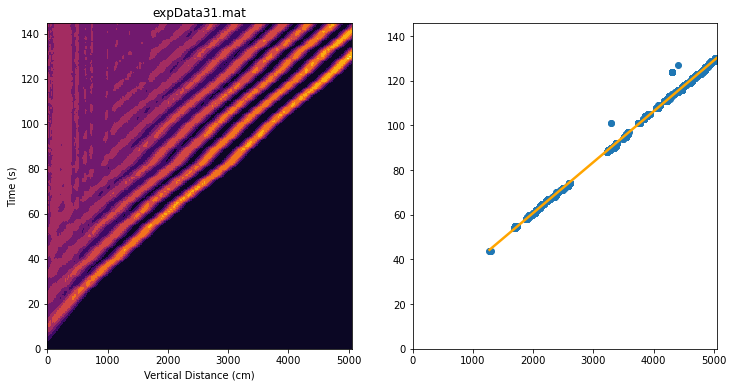

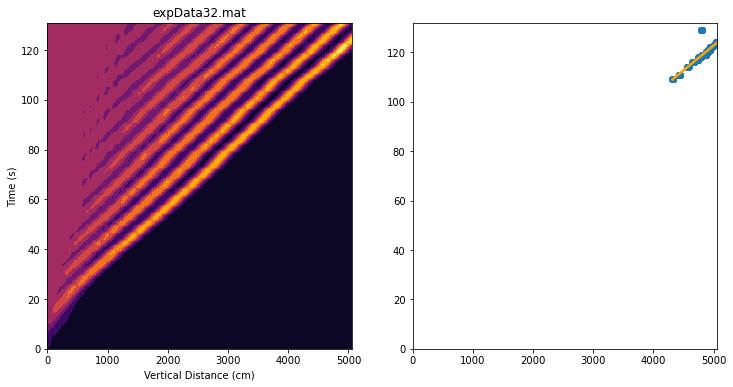

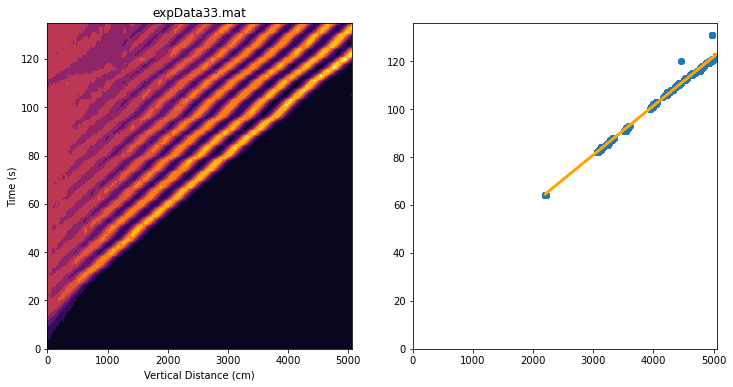

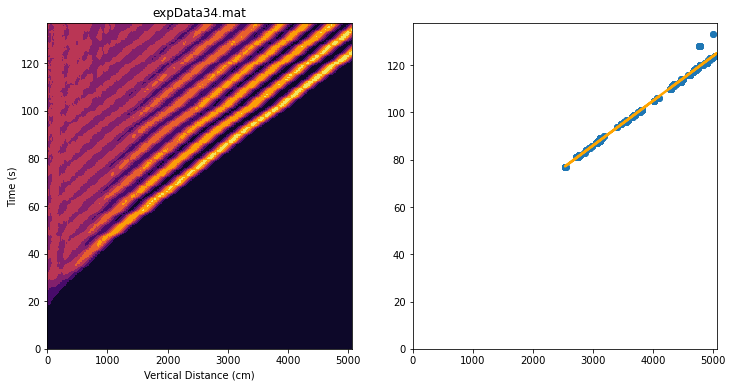

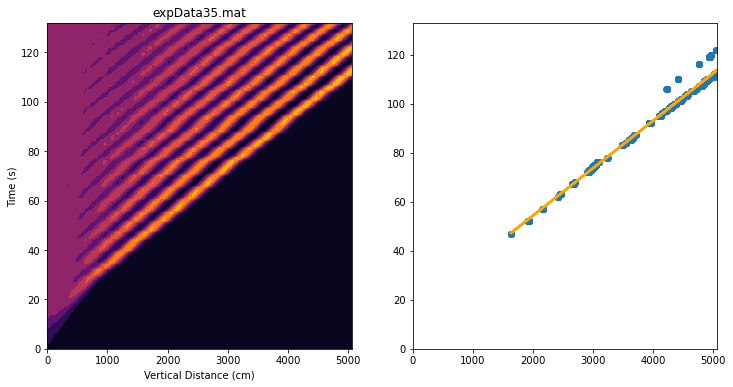

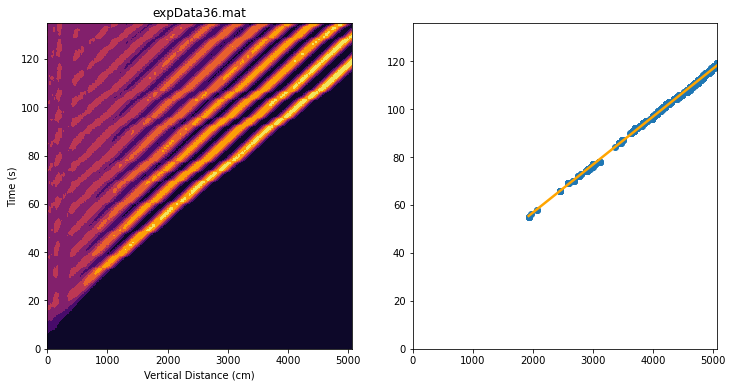

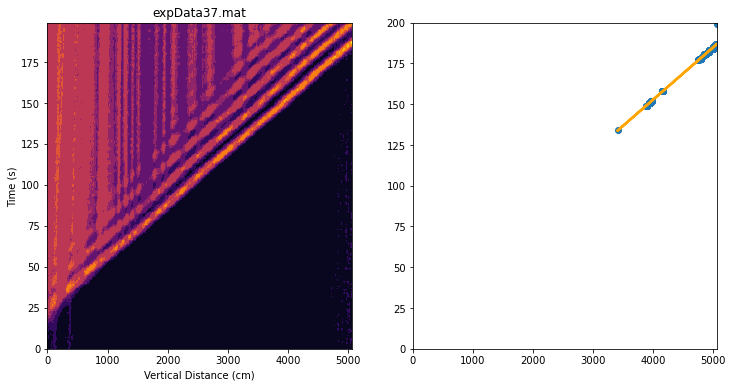

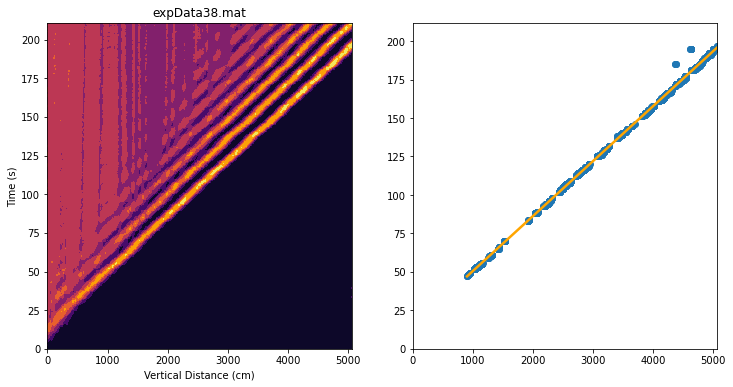

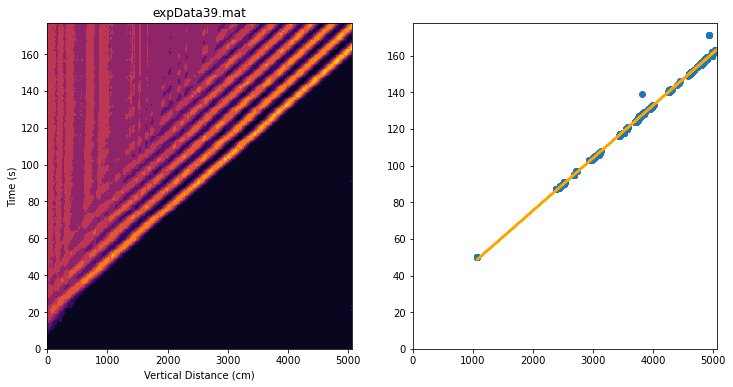

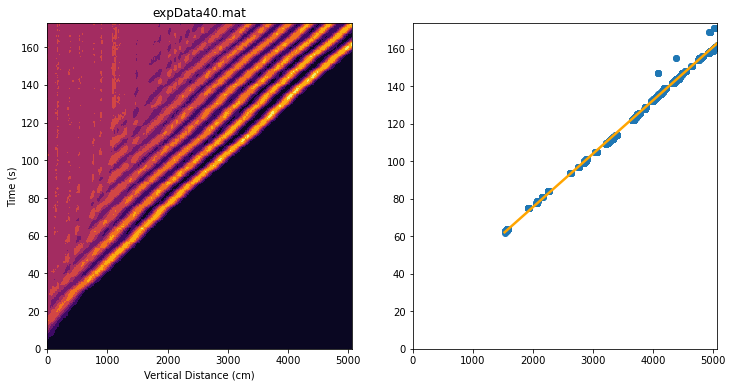

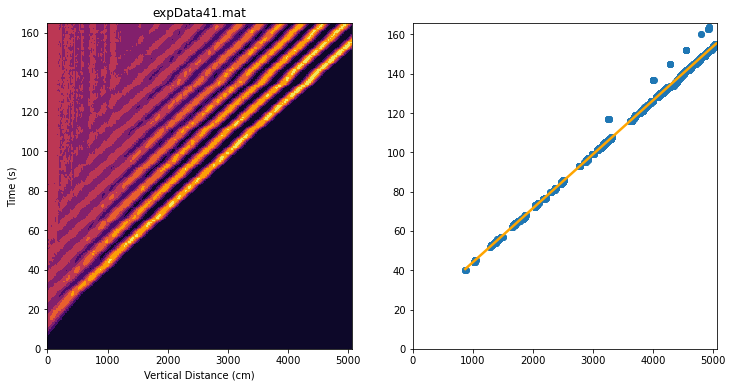

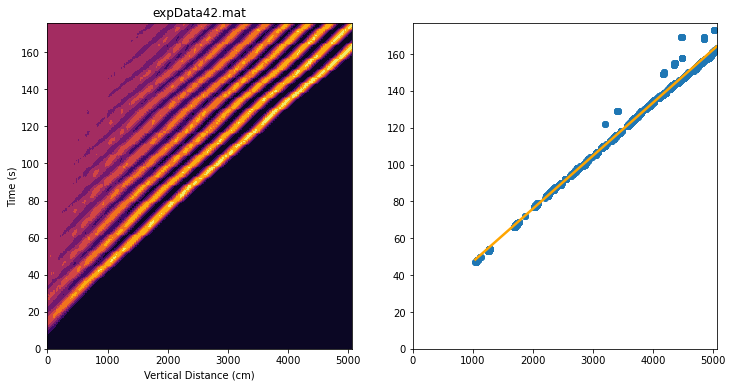

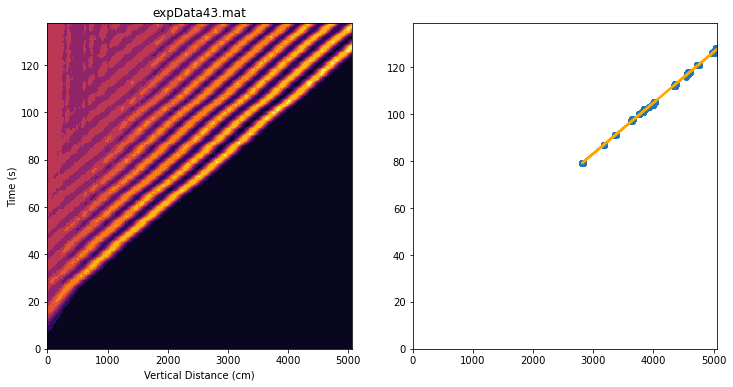

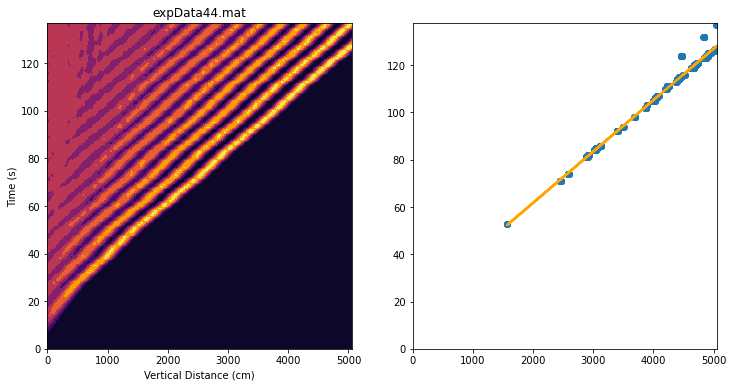

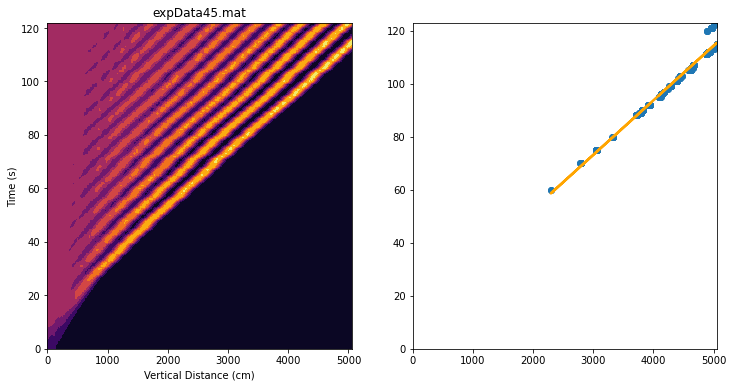

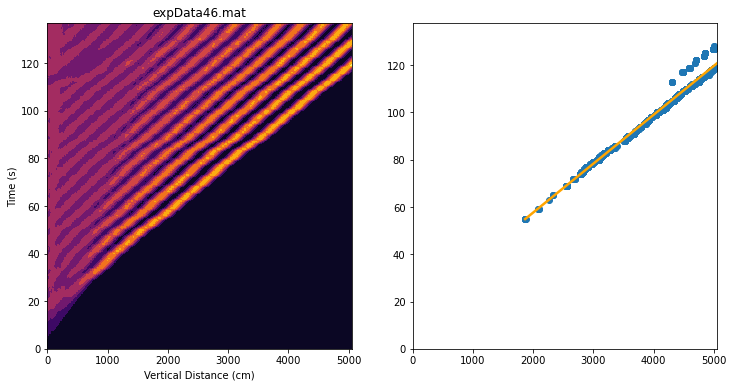

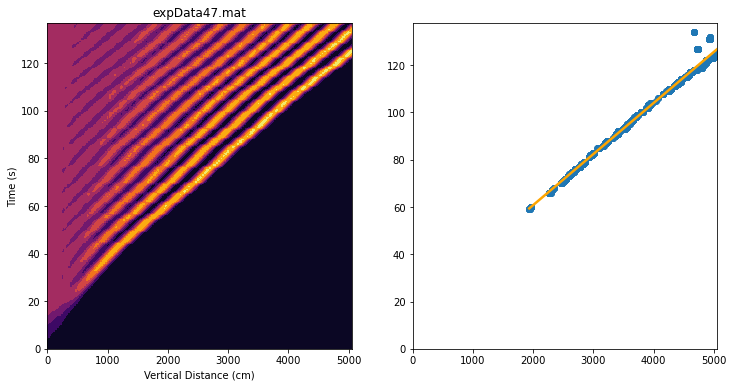

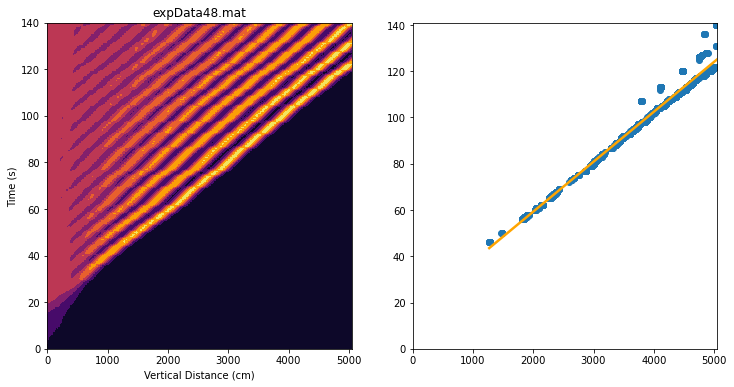

In [221]:
# data sets [17-48]
for num in range(17,49):
    data = 'expData' + str(num) + '.mat'
    dictionary = sp.loadmat(data)
    a0 = dictionary['A0'][0,0]
    
    new_dict = compute_soliton_speed(dictionary)
    m = (1 / new_dict['speed'])
    
    # append speed to list
    speeds_list.append( (a0, new_dict['speed'], num) )
    
    #make two plots side by side
    y_hat_vals = [m*x + new_dict['b'] for x in new_dict['xvals']]
    
    plt.figure(figsize = (12, 6))
    
    plt.subplot(1, 2, 1)
    plt.contourf(dictionary['Amat'])
    plt.xlabel('Vertical Distance (cm)')
    plt.ylabel('Time (s)')
    plt.title(data)
    
    plt.subplot(1, 2, 2)
    plt.scatter(*zip(*new_dict['solitonIdxs']))
    plt.plot(new_dict['xvals'], y_hat_vals, c = 'orange', linewidth = 2.5)
    plt.xlim(0,dictionary['z_vec'].size)
    plt.ylim(0,dictionary['t_vec'].size)
    
    plt.show()

In [222]:
speeds_list.sort()
speeds_list

[(1.89, 31.07531484499333, 27),
 (1.91, 20.91063251006179, 17),
 (2.02, 31.094439915998436, 37),
 (2.42, 34.16390006379253, 28),
 (2.46, 25.533728945610157, 18),
 (2.6, 27.946090500853867, 38),
 (3.05, 28.193599016615284, 19),
 (3.06, 39.18004750706236, 29),
 (3.22, 34.770565783552215, 39),
 (3.68, 29.572632294174145, 20),
 (3.71, 40.571615520768944, 30),
 (3.73, 35.05240759345575, 40),
 (4.16, 19.37927599413633, 10),
 (4.28, 43.9124784183508, 31),
 (4.32, 36.34259635016589, 41),
 (4.37, 31.085459396825616, 21),
 (4.94, 34.691390152032945, 42),
 (4.95, 49.802461701181905, 32),
 (4.96, 33.02565416270902, 22),
 (5.38, 33.587105437325974, 23),
 (5.61, 48.82586932969666, 33),
 (5.8, 21.731726233047223, 9),
 (5.82, 46.18390166054361, 43),
 (6.28, 52.72074638803709, 34),
 (6.3, 35.153028727535606, 24),
 (6.34, 45.938718068024684, 44),
 (6.98, 51.641798247578215, 35),
 (7.04, 48.53241146959496, 45),
 (7.07, 42.15352275737829, 25),
 (7.36, 21.297264501164097, 8),
 (7.78, 49.90322216921265, 36)

In [ ]:
# for dataset12 speed is 107 for original function

In [ ]:
# now need to figure out how to compare the experimental speeds to the theoretical speeds
# for each experimental A0, find the value of the theoretical c(A0), and then scale by multiplying this c(A0) to the 
## corresponding U0 value given in each data set??? 

### Same thing as above with modified function to try to fix the outliers

In [213]:
speeds_list = []

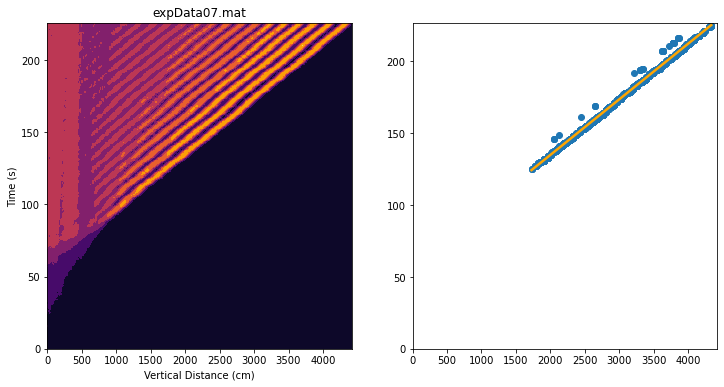

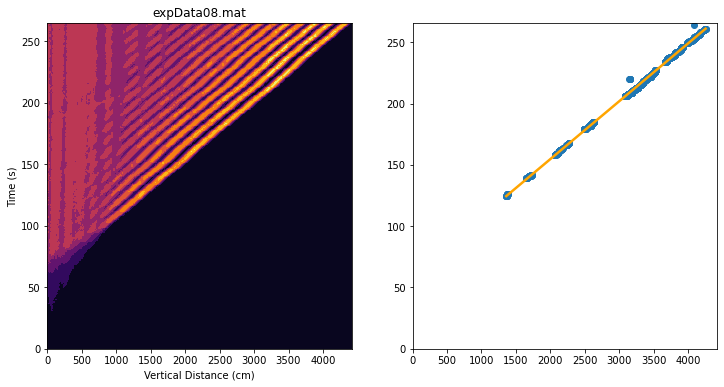

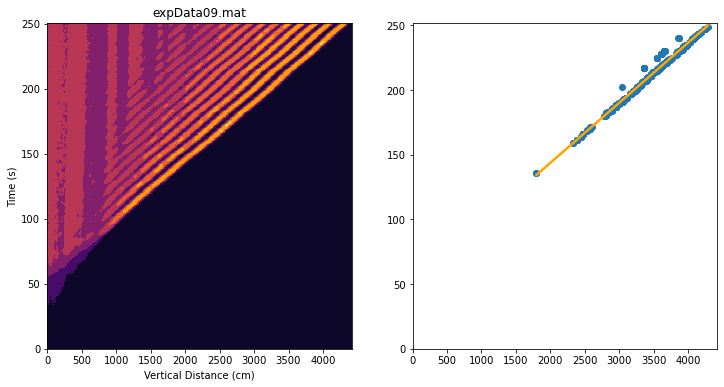

In [214]:
# data sets [7-9]
for num in range(7,10):
    data = 'expData0' + str(num) + '.mat'
    dictionary = sp.loadmat(data)
    a0 = dictionary['A0'][0,0]
    
    new_dict = compute_soliton_speed(dictionary)
    m = (1 / new_dict['speed'])
    
    # append speed to list
    speeds_list.append( (a0, new_dict['speed'], num) )
    
    #make two plots side by side
    y_hat_vals = [m*x + new_dict['b'] for x in new_dict['xvals']]
    
    plt.figure(figsize = (12, 6))
    
    plt.subplot(1, 2, 1)
    plt.contourf(dictionary['Amat'])
    plt.xlabel('Vertical Distance (cm)')
    plt.ylabel('Time (s)')
    plt.title(data)
    
    plt.subplot(1, 2, 2)
    plt.scatter(*zip(*new_dict['solitonIdxs']))
    plt.plot(new_dict['xvals'], y_hat_vals, c = 'orange', linewidth = 2.5)
    plt.xlim(0,dictionary['z_vec'].size)
    plt.ylim(0,dictionary['t_vec'].size)
    
    plt.show()    

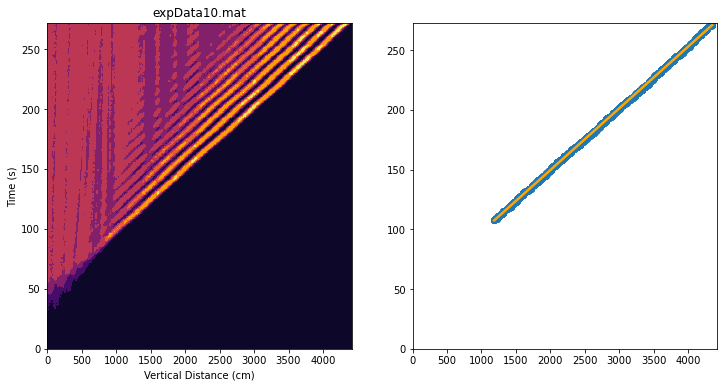

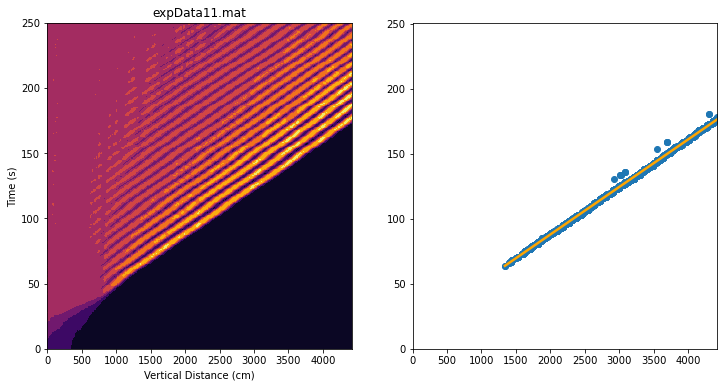

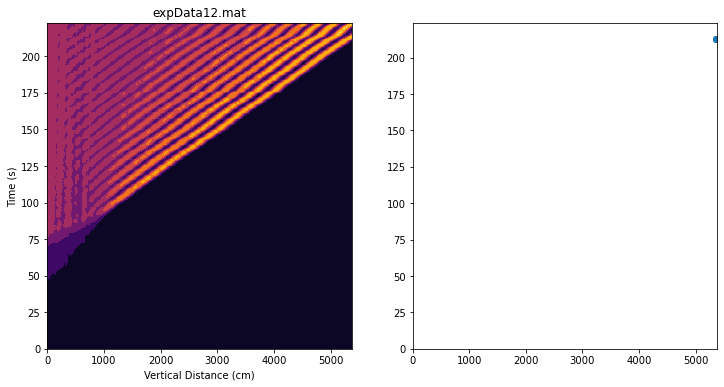

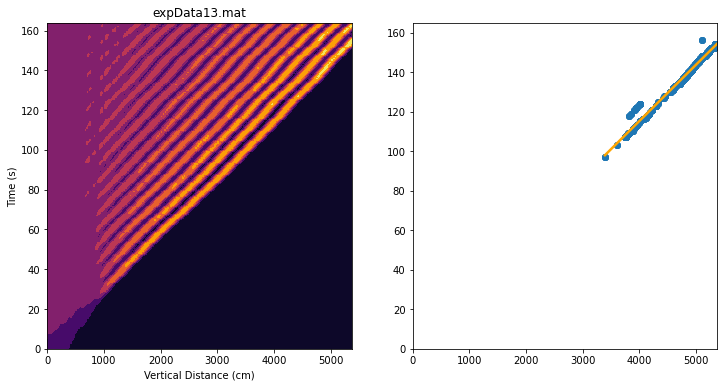

In [215]:
# data sets [10-13]
for num in range(10,14):
    data = 'expData' + str(num) + '.mat'
    dictionary = sp.loadmat(data)
    a0 = dictionary['A0'][0,0]
    
    new_dict = compute_soliton_speed(dictionary)
    m = (1 / new_dict['speed'])
    
    # append speed to list
    speeds_list.append( (a0, new_dict['speed'], num) )
    
    #make two plots side by side
    y_hat_vals = [m*x + new_dict['b'] for x in new_dict['xvals']]
    
    plt.figure(figsize = (12, 6))
    
    plt.subplot(1, 2, 1)
    plt.contourf(dictionary['Amat'])
    plt.xlabel('Vertical Distance (cm)')
    plt.ylabel('Time (s)')
    plt.title(data)
    
    plt.subplot(1, 2, 2)
    plt.scatter(*zip(*new_dict['solitonIdxs']))
    plt.plot(new_dict['xvals'], y_hat_vals, c = 'orange', linewidth = 2.5)
    plt.xlim(0,dictionary['z_vec'].size)
    plt.ylim(0,dictionary['t_vec'].size)
    
    plt.show()

In [216]:
speeds_list.sort()
speeds_list

[(4.16, 19.35369135483943, 10),
 (5.8, 21.543080758189912, 9),
 (7.36, 21.192675852146184, 8),
 (8.46, 25.838511189984487, 7),
 (10.5, 27.356601347858586, 11),
 (11.3, 42428967588738.414, 12),
 (12.3, 35.09758468453896, 13)]

**At this point, notice that the modified function is not making enough of a difference in removing outliers from the SolitonIdxs to make a change from the original implementation.**

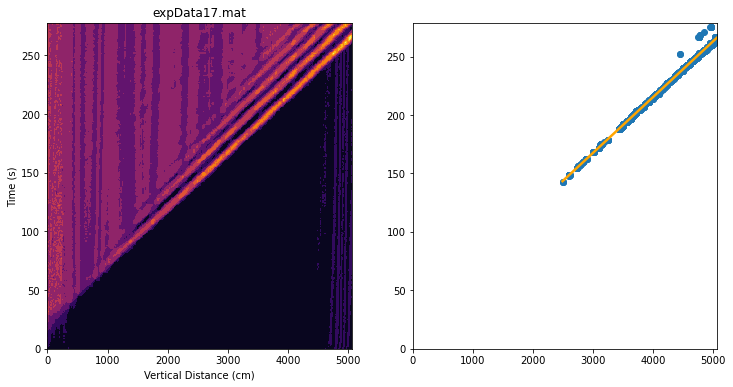

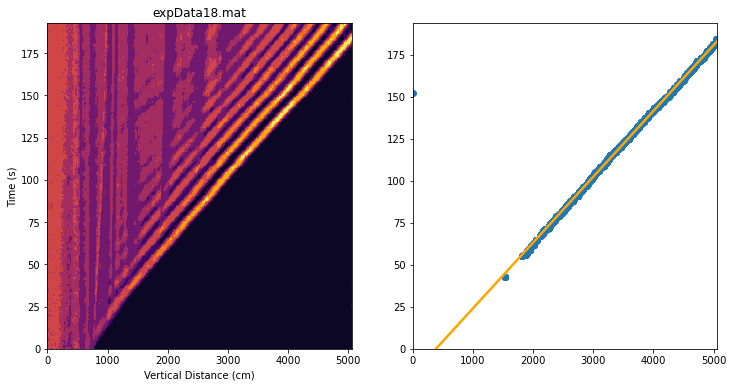

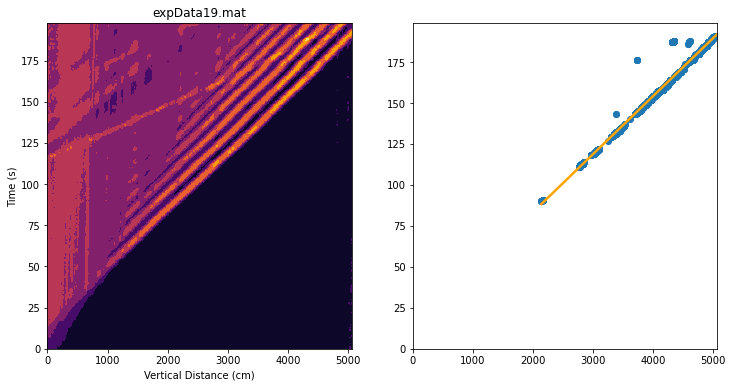

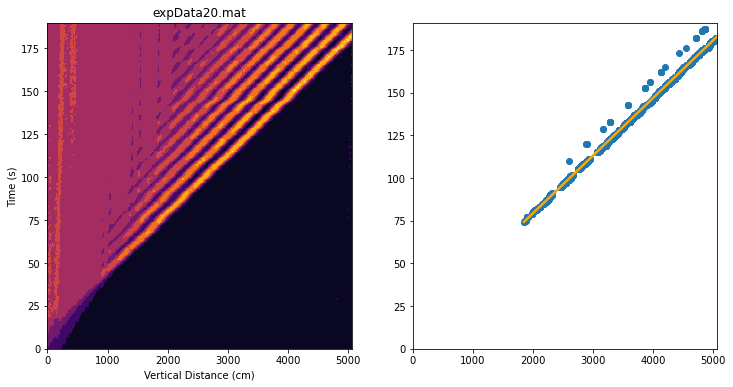

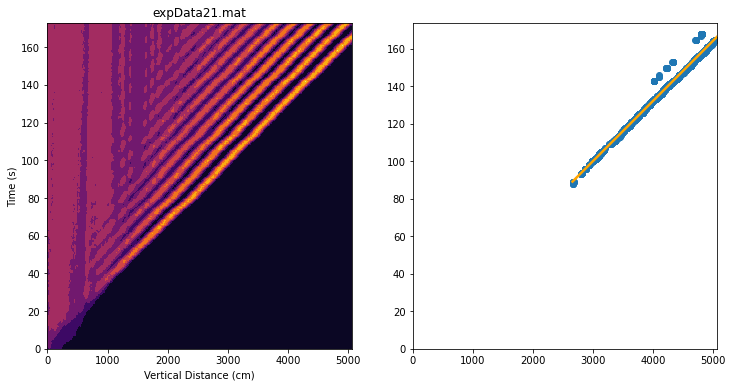

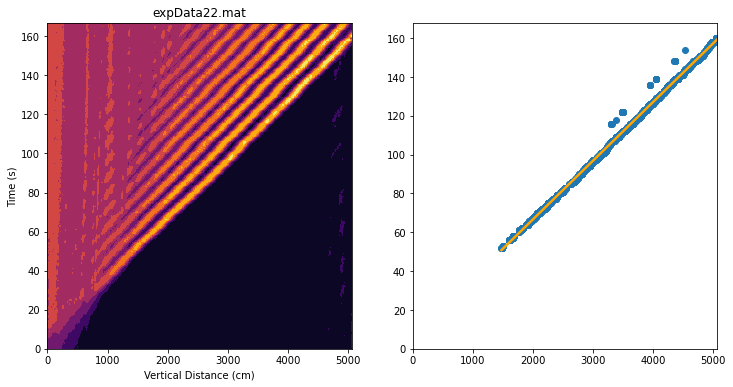

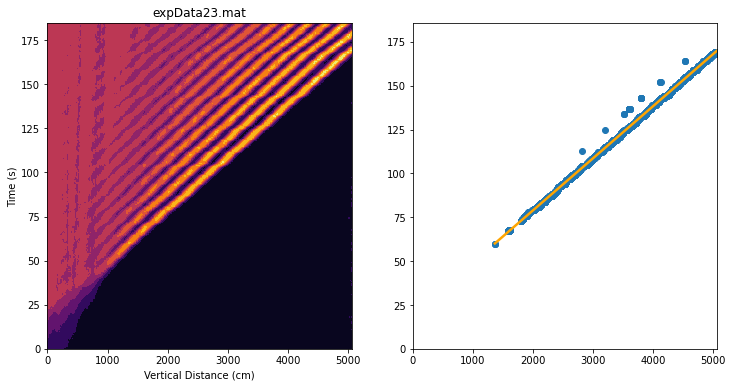

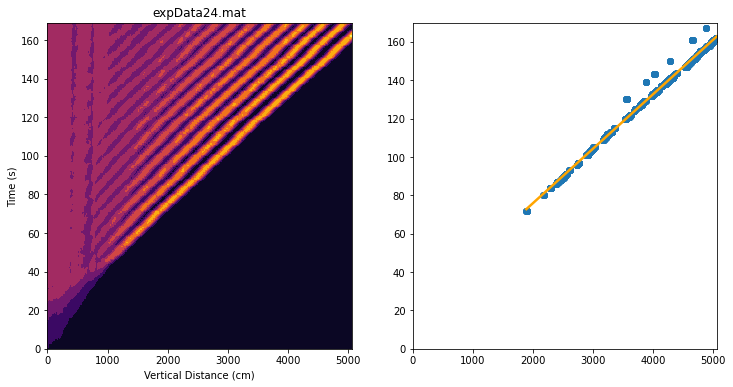

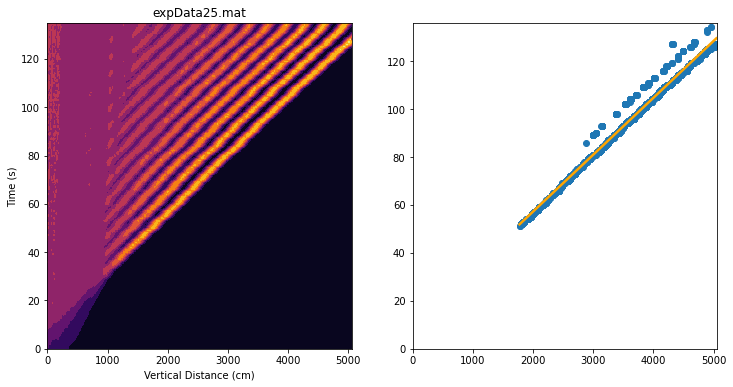

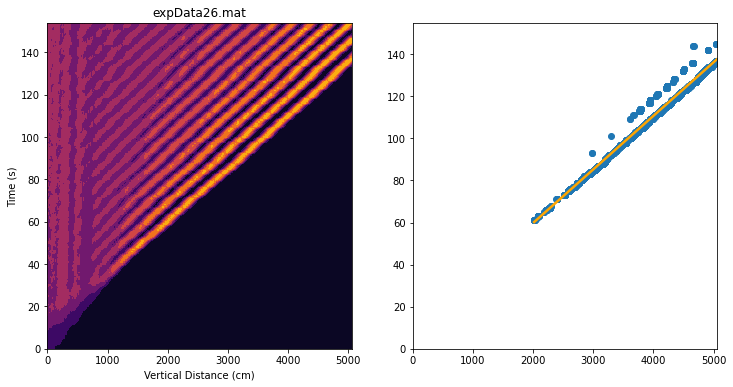

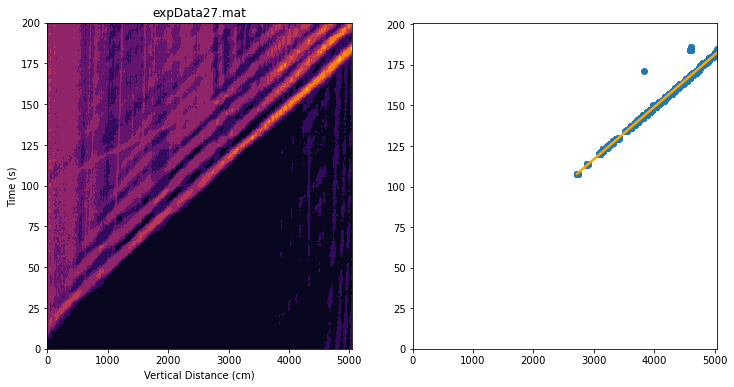

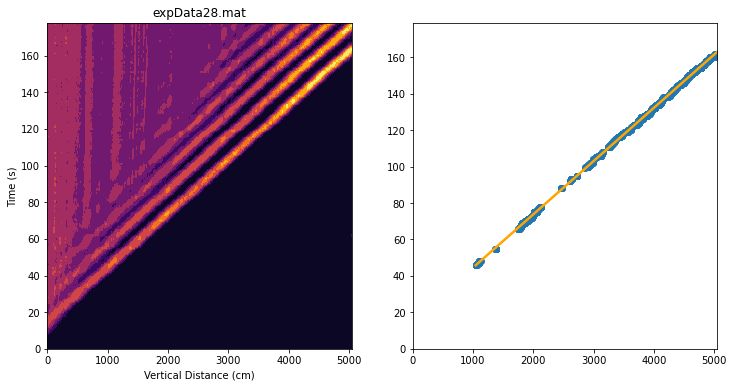

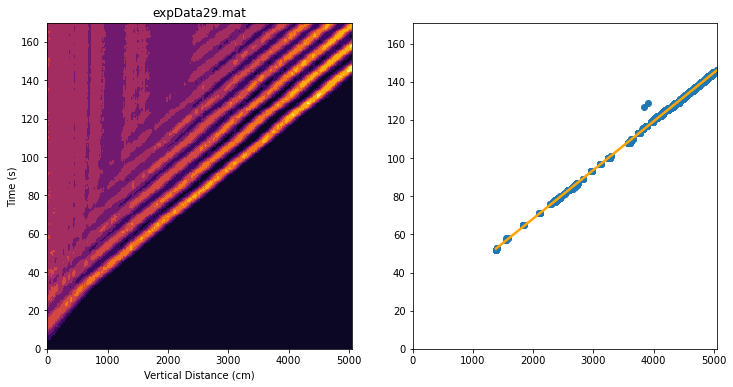

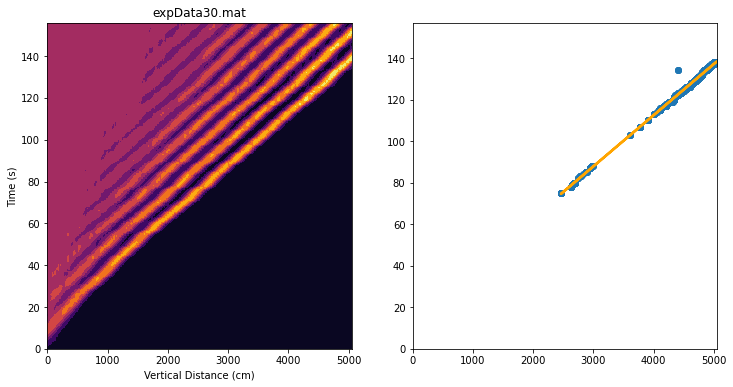

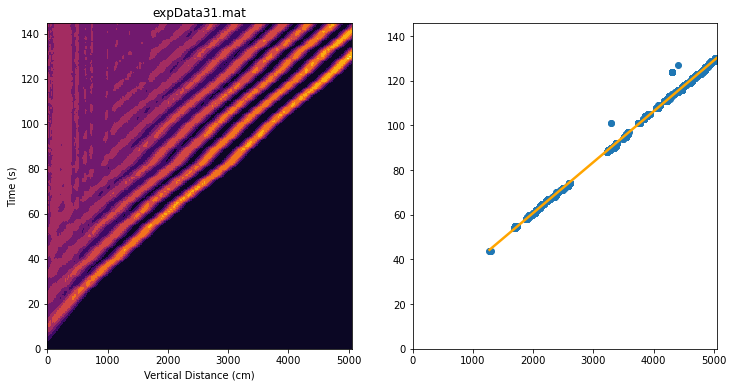

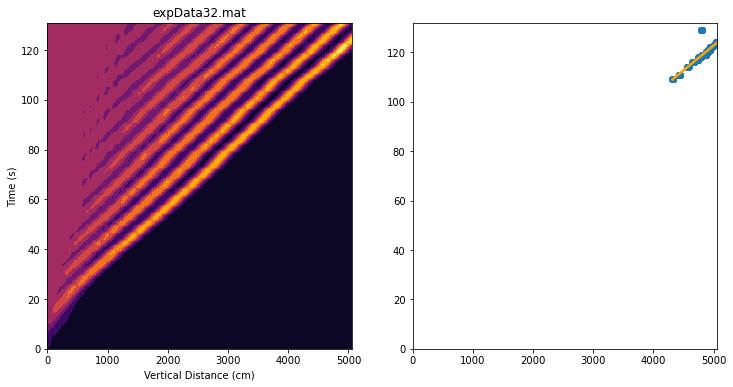

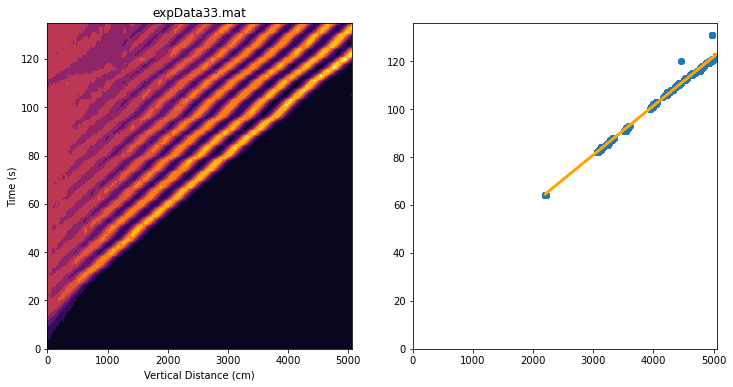

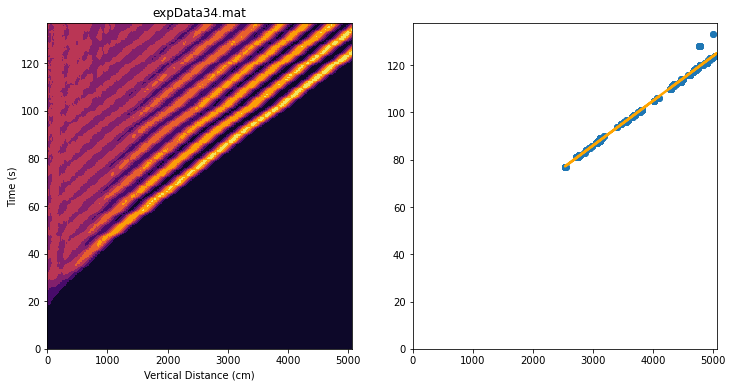

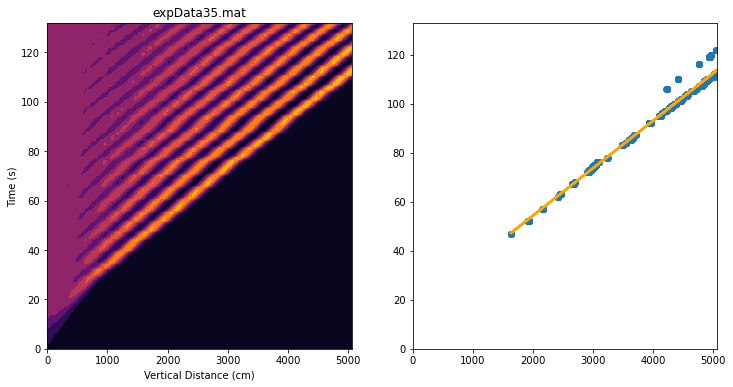

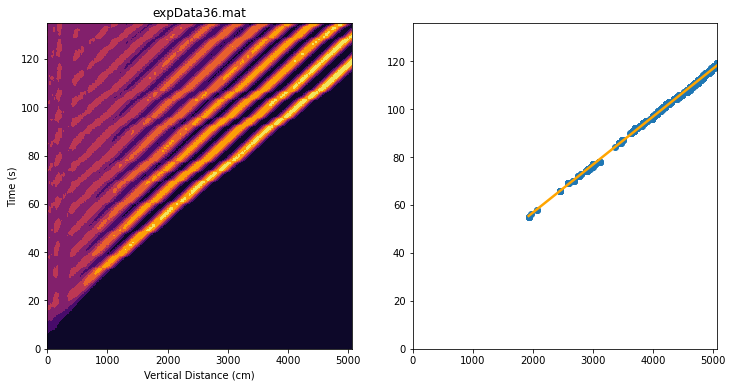

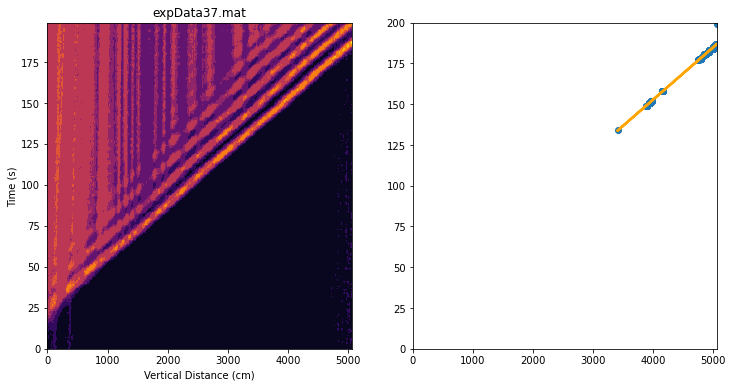

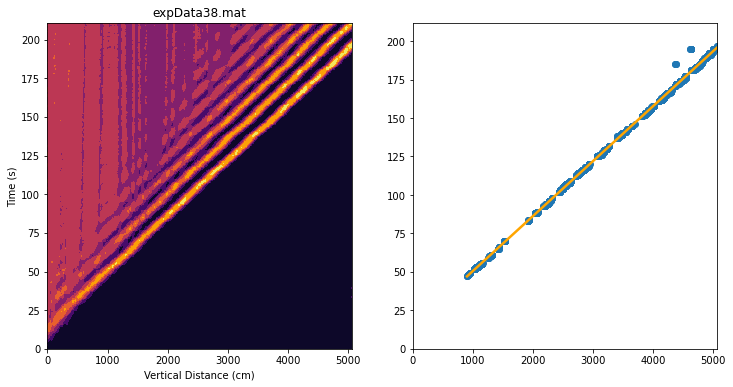

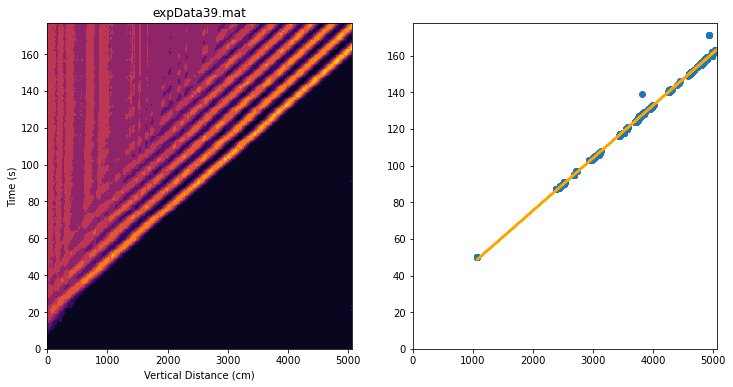

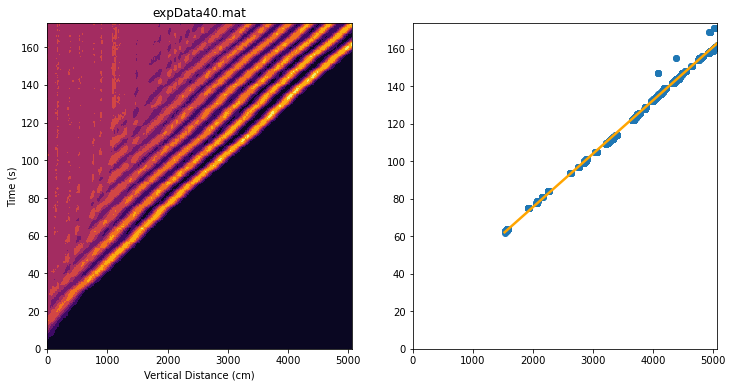

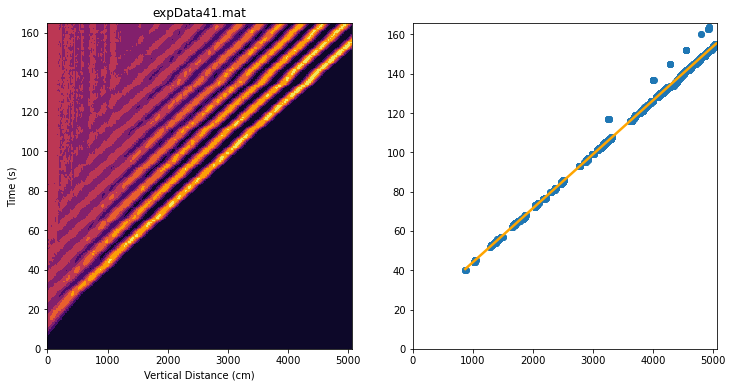

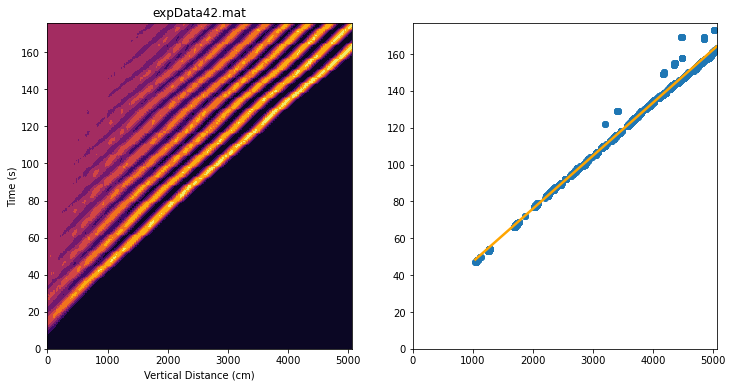

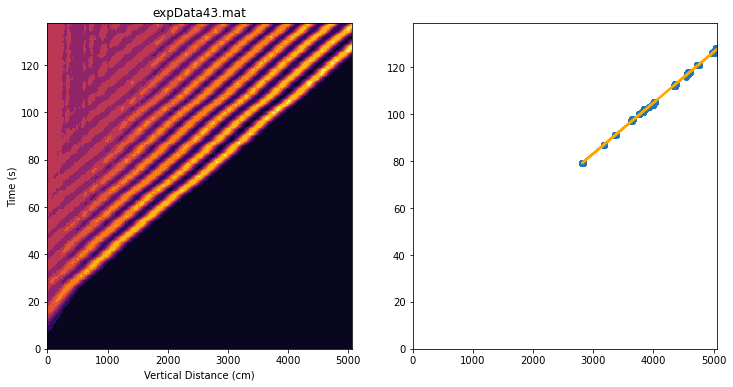

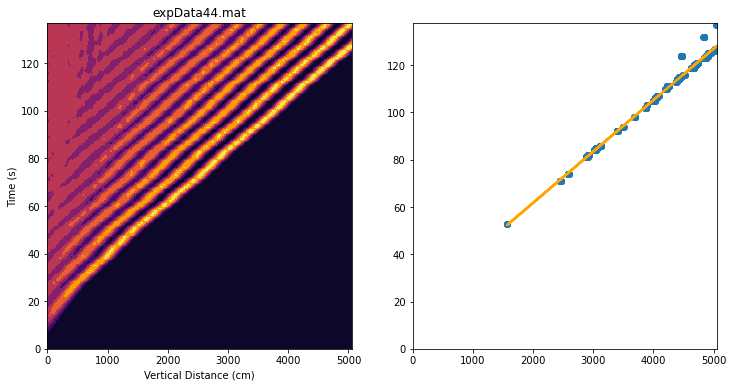

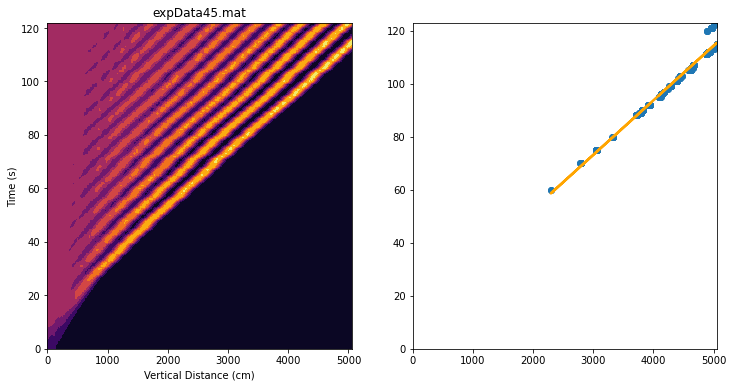

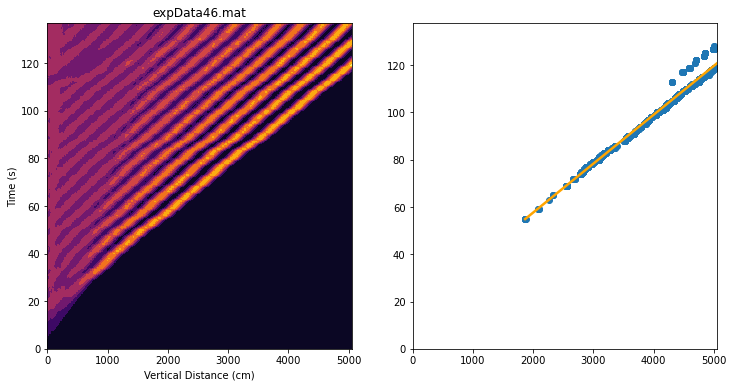

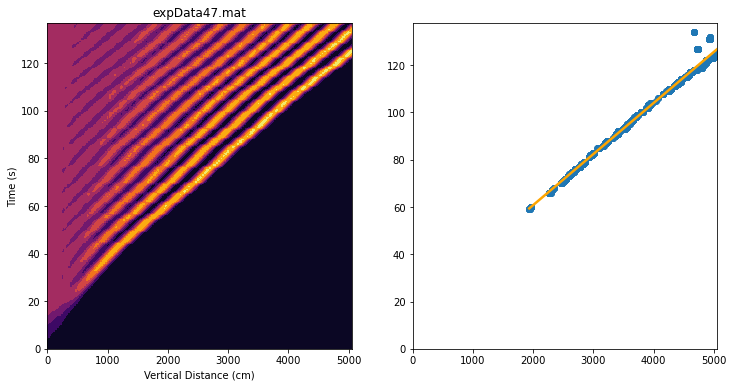

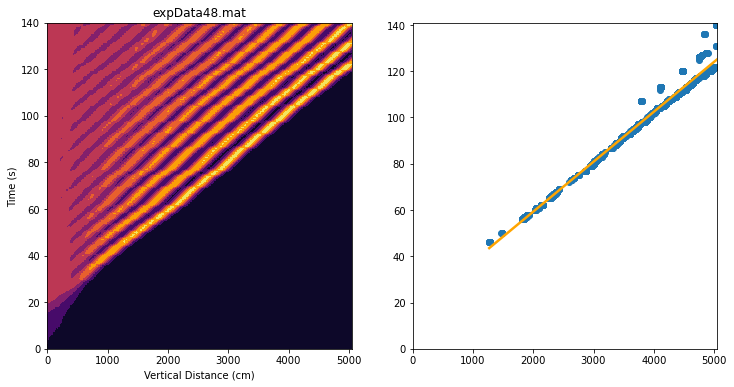

In [206]:
# data sets [17-48]
for num in range(17,49):
    data = 'expData' + str(num) + '.mat'
    dictionary = sp.loadmat(data)
    a0 = dictionary['A0'][0,0]
    
    new_dict = compute_soliton_speed(dictionary)
    m = (1 / new_dict['speed'])
    
    # append speed to list
    speeds_list.append( (a0, new_dict['speed'], num) )
    
    #make two plots side by side
    y_hat_vals = [m*x + new_dict['b'] for x in new_dict['xvals']]
    
    plt.figure(figsize = (12, 6))
    
    plt.subplot(1, 2, 1)
    plt.contourf(dictionary['Amat'])
    plt.xlabel('Vertical Distance (cm)')
    plt.ylabel('Time (s)')
    plt.title(data)
    
    plt.subplot(1, 2, 2)
    plt.scatter(*zip(*new_dict['solitonIdxs']))
    plt.plot(new_dict['xvals'], y_hat_vals, c = 'orange', linewidth = 2.5)
    plt.xlim(0,dictionary['z_vec'].size)
    plt.ylim(0,dictionary['t_vec'].size)
    
    plt.show()

In [68]:
3+4+32

39

In [104]:
# compute_soliton_speed(sp.loadmat('expData45.mat'))

In [186]:
speeds_list.sort()
# len(speeds_list)
speeds_list[37] = (11.3, 37.24, 12)
# speeds_list

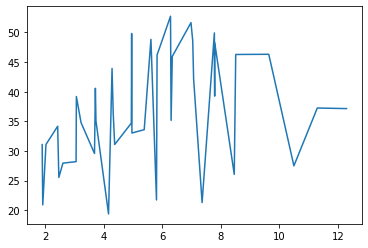

In [184]:
xvals = [s[0] for s in speeds_list]
yvals = [s[1] for s in speeds_list]

plt.plot(xvals, yvals)
plt.show()

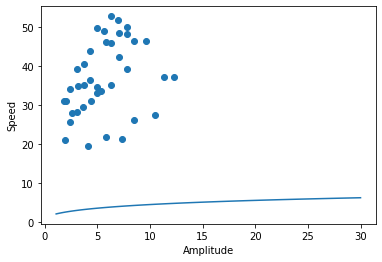

In [187]:
avals = np.linspace(1.1, 30, 100)
cvals = (avals**2 * np.log(avals**2) - avals**2 + 1) / ((avals-1)**2)

x,y,z = zip(*speeds_list)
plt.scatter(x, y)

plt.plot(avals,cvals)
plt.ylabel('Speed')
plt.xlabel('Amplitude')

plt.show()

**Question:** How do you account for error in the speed calculation?

In [ ]:
theoreticals = [a**2 * np.log(a**2) - a**2 + 1) / ((a-1)**2

In [2]:
avals = np.linspace(1.1, 30, 100)
cvals = (avals**2 * np.log(avals**2) - avals**2 + 1) / ((avals-1)**2)

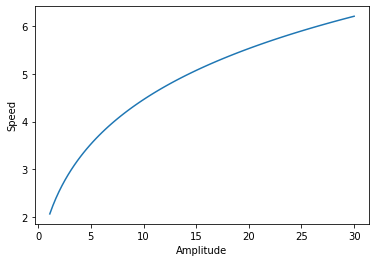

In [3]:
plt.plot(avals,cvals)
plt.ylabel('Speed')
plt.xlabel('Amplitude')
plt.show()

In [41]:
# list(range(17,49))

# Scratch

In [18]:
wave.size

8680

In [19]:
mat08 = sp.loadmat('expData08.mat')
print(mat08['A0'], mat08['A0_error'])

[[7.36]] [[0.7]]


In [20]:
arr = np.array([2,3,3,4,5,6,8])

In [21]:
lst = [(0,0), (1,3), (2,6), (3,9), (4,12), (5,15)]
yvals = [e[1] for e in lst]

In [31]:
# plt.plot(yvals, 'o')
# plt.axis('equal')
# xvals = np.arange(6)
# plt.show()

In [49]:
full_maxj = 0                   # find the maximum j coordinate within the indices
for idx in fullWaveIdxs:
    if idx[1] > full_maxj:
        full_maxj = idx[1]
full_maxj

4353

In [50]:
full_maxjIdxs = []                # find indices with this maxj coordinate
for idx in fullWaveIdxs:
    if idx[1] == full_maxj:
        full_maxjIdxs.append(idx)
full_maxjIdxs

[(226, 4353)]

In [51]:
full_mini = full_maxj               # find the minimum i coordinate within the maxj indices
for idx in full_maxjIdxs:      
    if idx[0] < full_mini:
        full_mini = idx[0]
# full_mini

In [52]:
solitonIdx2 = (0,0)                   # the index from the maxj index list with the mini coordinate is the soliton
for idx in full_maxjIdxs:
    if idx[0] == full_mini:
        solitonIdx2 = idx
solitonIdx2

(226, 4353)

**Half Wave**

In [81]:
halfWaveIdxs = []                  # first get possible indexes
for i in range(227):
    for j in range(2218):
        if (mat07[i,j]>8.26) & (mat07[i,j]<8.66):
            halfWaveIdxs.append((i,j))
#int(np.floor(4418*.75))

In [82]:
half_maxj = 0                  # find the maximum j coordinate within the indices
for idx in halfWaveIdxs:
    if idx[1] > half_maxj:
        half_maxj = idx[1]
half_maxj

2217

In [83]:
half_maxjIdxs = []                # find indices with this maxj coordinate
for idx in halfWaveIdxs:
    if idx[1] == half_maxj:
        half_maxjIdxs.append(idx)        
half_maxjIdxs

[(143, 2217), (144, 2217), (153, 2217)]

In [84]:
half_mini = half_maxj               # find the minimum i coordinate within the maxj indices
for idx in half_maxjIdxs:      
    if idx[0] < half_mini:
        half_mini = idx[0]
# half_mini

In [85]:
solitonIdx1 = (0,0)                   # the index from the maxj index list with the mini coordinate is the soliton
for idx in half_maxjIdxs:
    if idx[0] == half_mini:
        solitonIdx1 = idx
solitonIdx1

(143, 2217)

(0.0, 227.0)

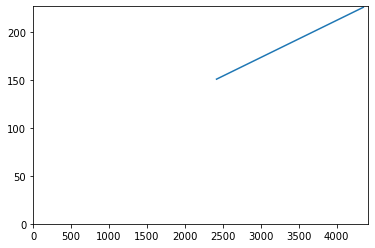

In [86]:
plt.plot([2417,4353], [151,226])
plt.xlim(0,4417)
plt.ylim(0,227)

In [77]:
# slope07 = (226-151)/(4353-2417)
# slope07 = 

In [87]:
speed07 = (solitonIdx2[1] - solitonIdx1[1]) / (solitonIdx2[0] - solitonIdx1[0])
speed07

25.734939759036145

**Function**

In [41]:
dictionary = sp.loadmat('expData07.mat')

mat = dictionary['Amat']
times = mat.shape[0]
distances = mat.shape[1]
a0 = dictionary['A0'][0,0]
a0_error = dictionary['A0_error'][0,0]
solitonAmpRange = ((a0 - a0_error), (a0 + a0_error))

## FULL WAVE
fullWaveIdxs = []                    # first get possible soliton indexes
for i in range(times):
    for j in range(distances):
        if (mat[i,j]>solitonAmpRange[0]) & (mat[i,j]<solitonAmpRange[1]):
            fullWaveIdxs.append((i,j))

full_maxj = 0                   # find the maximum j coordinate within the indices
for idx in fullWaveIdxs:
    if idx[1] > full_maxj:
        full_maxj = idx[1]

full_maxjIdxs = []                # find indices with this maxj coordinate
for idx in fullWaveIdxs:
    if idx[1] == full_maxj:
        full_maxjIdxs.append(idx)

full_mini = full_maxj               # find the minimum i coordinate within the maxj indices
for idx in full_maxjIdxs:      
    if idx[0] < full_mini:
        full_mini = idx[0]

solitonIdx2 = (0,0)                 # the index from the maxj index list with the mini coordinate is the soliton
for idx in full_maxjIdxs:
    if idx[0] == full_mini:
        solitonIdx2 = idx


## 3/4 WAVE
halfWaveIdxs = []                  # first get possible soliton indexes from 75% of the data
for i in range(times):
    for j in range(int(np.floor(distances*.75))):
        if (mat[i,j]>solitonAmpRange[0]) & (mat[i,j]<solitonAmpRange[1]):
            halfWaveIdxs.append((i,j))

half_maxj = 0                     # find the maximum j coordinate within the indices
for idx in halfWaveIdxs:
    if idx[1] > half_maxj:
        half_maxj = idx[1]

half_maxjIdxs = []                # find indices with this maxj coordinate
for idx in halfWaveIdxs:
    if idx[1] == half_maxj:
        half_maxjIdxs.append(idx)        

half_mini = half_maxj               # find the minimum i coordinate within the maxj indices
for idx in half_maxjIdxs:      
    if idx[0] < half_mini:
        half_mini = idx[0]

solitonIdx1 = (0,0)                  # the index from the maxj index list with the mini coordinate is the soliton
for idx in half_maxjIdxs:
    if idx[0] == half_mini:
        solitonIdx1 = idx

## Find speed of soliton
speed = (solitonIdx2[1] - solitonIdx1[1]) / (solitonIdx2[0] - solitonIdx1[0])

In [46]:
solitonIdx2

(226, 4353)

In [29]:
def get_soliton_speed(dictionary):
    mat = dictionary['Amat']
    times = mat.shape[0]
    distances = mat.shape[1]
    a0 = dictionary['A0'][0,0]
    a0_error = dictionary['A0_error'][0,0]
    solitonAmpRange = ((a0 - a0_error), (a0 + a0_error))
    
    ## FULL WAVE
    fullWaveIdxs = []                    # first get possible soliton indexes
    for i in range(times):
        for j in range(distances):
            if (mat[i,j]>solitonAmpRange[0]) & (mat[i,j]<solitonAmpRange[1]):
                fullWaveIdxs.append((i,j))

    full_maxj = 0                   # find the maximum j coordinate within the indices
    for idx in fullWaveIdxs:
        if idx[1] > full_maxj:
            full_maxj = idx[1]
            
    full_maxjIdxs = []                # find indices with this maxj coordinate
    for idx in fullWaveIdxs:
        if idx[1] == full_maxj:
            full_maxjIdxs.append(idx)

    full_mini = full_maxj               # find the minimum i coordinate within the maxj indices
    for idx in full_maxjIdxs:      
        if idx[0] < full_mini:
            full_mini = idx[0]

    solitonIdx2 = (0,0)                 # the index from the maxj index list with the mini coordinate is the soliton
    for idx in full_maxjIdxs:
        if idx[0] == full_mini:
            solitonIdx2 = idx

            
    ## 3/4 WAVE
    halfWaveIdxs = []                  # first get possible soliton indexes from 75% of the data
    for i in range(times):
        for j in range(int(np.floor(distances*.75))):
            if (mat[i,j]>solitonAmpRange[0]) & (mat[i,j]<solitonAmpRange[1]):
                halfWaveIdxs.append((i,j))

    half_maxj = 0                     # find the maximum j coordinate within the indices
    for idx in halfWaveIdxs:
        if idx[1] > half_maxj:
            half_maxj = idx[1]

    half_maxjIdxs = []                # find indices with this maxj coordinate
    for idx in halfWaveIdxs:
        if idx[1] == half_maxj:
            half_maxjIdxs.append(idx)        

    half_mini = half_maxj               # find the minimum i coordinate within the maxj indices
    for idx in half_maxjIdxs:      
        if idx[0] < half_mini:
            half_mini = idx[0]
            
    solitonIdx1 = (0,0)                  # the index from the maxj index list with the mini coordinate is the soliton
    for idx in half_maxjIdxs:
        if idx[0] == half_mini:
            solitonIdx1 = idx
            
    ## Find speed of soliton
    speed = (solitonIdx2[1] - solitonIdx1[1]) / (solitonIdx2[0] - solitonIdx1[0])
    
    return speed

In [30]:
get_soliton_speed(sp.loadmat('expData07.mat'))

26.025

In [26]:
np.floor(4418*.75)

3313.0

In [32]:
# plt.plot(waveIdxs, 'o')
# plt.axis('equal')
# plt.show()

### Dataframe method?
* find two points on the leading edge and calculate the slope of the line (linear)

In [99]:
# df07 = pd.DataFrame(mat07)
# df07

In [98]:
# top = df07.head(50)[(df07.head(50) >= A0 - A0_error) & (df07.head(50) <= A0 + A0_error)]

In [96]:
# plt.figure(figsize = (12,6))
# plt.contourf(df07)
# plt.colorbar()
# plt.xlabel('Vertical Distance (cm)')
# plt.ylabel('Time (s)')
# plt.show()

In [95]:
# arr = np.arange(1, 19).reshape(3, 6)
# df = pd.DataFrame(arr)
# df

In [94]:
# new = df[(df>4) & (df<12)]
# new

In [92]:
# new[new.notnull()].max()